#[عبدالرؤوف حسحس _طوني بطرس _عبد الله الزبداني]

<h1 style="text-align: center;">Text Classification<h1>

Prepare libraries

In [1]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Conv1D, AveragePooling1D, Flatten, Dropout
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
import re
import numpy as np
from cleantext import clean
from arabicstopwords.stopwords_lexicon import stopwords_lexicon
import arabicstopwords.arabicstopwords as stop_words
import nltk
from nltk.stem.isri import ISRIStemmer
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from nltk import bigrams, trigrams
from collections import Counter
from snowballstemmer import stemmer
from tashaphyne.stemming import ArabicLightStemmer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
from matplotlib.font_manager import FontProperties
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

from nltk.tokenize import word_tokenize


download 

Download data

In [310]:
# !wget 'https://drive.google.com/uc?export=download&id=1cMSjxa3nA706LIZDEhwMpaVRMY2IX9P0' -O 'data.zip'

In [311]:
# !pip install Arabic-Stopwords
# 2.2 nltk.download('punkt') # open vpn
# 2.3 !pip install arabic-reshaper
# 2.4 nltk.download('stopwords')
# 3.8 !pip install snowballstemmer
# 3.8 !pip install Tashaphyne
# 3.8 !pip install -U farasapy

In [312]:
# !unzip data.zip

<h2 dir="rtl">مثال عن كيفية تنظيف حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [313]:
# your code here


In [314]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Load the data

## [1.1]

In [2]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'
validation_file_path = 'val.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
validation_data = pd.read_csv(validation_file_path)

print("number of data in train data : ",len(train_data))
print("number of data in test data : ",len(test_data))
print("number of data in validation data : ",len(validation_data))

number of data in train data :  52758
number of data in test data :  17586
number of data in validation data :  17586


In [3]:
train_data.head(10)

question  \
0  \r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5...   
1  \r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علم...   
2            \r\nحلول منزلية لأعراض ارتفاع ضغط الدم    
3  \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
4  \r\nما حقيقة ان تمرين العضلة النعلية يخفض السك...   
5  \r\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره...   
6  \r\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن ...   
7  \r\nعملت عن البواسير منذ شهر وعانيت خلال التبر...   
8  \r\nبالله عليكم امي اجريت عملية جراحية على فخذ...   
9  \r\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة م...   

                                              answer                     label  
0  \r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد...                      الدم  
1  \r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب...  الاورام-الخبيثة-والحميدة  
2  \r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي ل...                جراحة-عامة  
3  \r\n\r\nراجع طبيبك من اجري الجراحه افضل من يجي...      أمراض-الجهاز-التنفسي  
4  \r\n\r\nإذا قصدت تدليك العضلة فهذا كلام غير صح...                مرض-السكري  
5  \r\n\r\nلا يمكن الإجابة على هذا السؤال بدون فح...                أمراض-الدم  
6  \r\n\r\nالفحص سليم من عدا أمرين:\r\n١. تضخم بس...              الغدد-الصماء  
7  \r\n\r\nلا يوحد مشكلة بالمشي. الاكثار من شرب ا...            الجهاز-التنفسي  
8  \r\n\r\nانها السيروما سائل من الانسجة بعد الجر...           ارتفاع-ضغط-الدم  
9  \r\n\r\nلا ينصح بممارسة الرياضة بعد الأكل مباش...        أمراض_الغدد_الصماء

In [4]:
test_data.head(10)

question  \
0  \r\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا...   
1  \r\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه...   
2  \r\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساع...   
3  \r\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم ...   
4  \r\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات ال...   
5  \r\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتو...   
6  \r\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال ...   
7  \r\nكيف التوقف عن اخذ جرعات الثايروكسين ان كان...   
8  \r\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى...   
9  \r\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى...   

                                              answer                     label  
0  \r\n\r\nاخي الكريم استخدم أقراص مضادة للالتهاب...                جراحة-عامة  
1  \r\n\r\nنعم يمكن وهناك كثير من الدراسات التي ت...           ارتفاع-ضغط-الدم  
2  \r\n\r\nالنتيجة طبيعية\r\n2\r\n2023-06-03 08:1...      امراض_الجهاز_التنفسي  
3  \r\n\r\nيفضل طبعا عمل رنين لانه ادق بكثير لمعر...  الاورام-الخبيثة-والحميدة  
4  \r\n\r\nالعودة والكشف عند الطبيب لمعرفة اثار ا...           ارتفاع-ضغط-الدم  
5  \r\n\r\nظهور السكر بالبول متوقع في الحمل الطبي...        امراض الغدد الصماء  
6  \r\n\r\nالافضل مراجعة طبيبك الذي اجرى الجراحة ...                جراحة-عامة  
7  \r\n\r\nممكن التوقف عنها مرة واحدة ولكن يفضل ب...        امراض-الغدد-الصماء  
8  \r\n\r\nراجع جراحك ولا خوف\r\n0\r\n2023-06-05 ...                جراحة-عامة  
9  \r\n\r\nراجع جراحك ولا خوف\r\n0\r\n2023-06-05 ...                جراحة-عامة

In [5]:
validation_data.head(10)

question  \
0               \r\nما هى الاعراض الاولى لمرض السكر    
1      \r\nكيف يمكن علاج الناسور العصعصي بدون جراحة    
2  \r\nماهي الاثار الجانبية لستئصال الغده الدرقيه...   
3  \r\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حق...   
4  \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
5  \r\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب ب...   
6  \r\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب ب...   
7  \r\nعملت اتستصال للفص الايمن من الدرقية. الحمد...   
8  \r\nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ...   
9  \r\nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي ...   

                                              answer                     label  
0  \r\n\r\nأعراض مرض السكر كثيره أهمها العطش كثرة...                جراحة عامة  
1  \r\n\r\nعلاج الناسور العصعصي يكون بالجراحة فقط...              جراحة_العظام  
2  \r\n\r\nهناك تغييرات عديدة في العمليات الحيوية...           ارتفاع_ضغط_الدم  
3  \r\n\r\nيجب اتباع التعليمات الطبية و عدم وقف ا...        امراض-الغدد-الصماء  
4  \r\n\r\nمرحبا،\r\nبعد العملية، يمكن أن يحدث بع...      أمراض الجهاز التنفسي  
5  \r\n\r\nمين قالك تاخذ B12 ما هي بالمزاج ولا با...  الاورام الخبيثة والحميدة  
6  \r\n\r\nمين قالك تاخذ B12 ما هي بالمزاج ولا با...                جراحة_عامة  
7  \r\n\r\nتورم الجرح بعد الجراحه امر طبيعى وقد ي...                      الدم  
8  \r\n\r\nنعم يجب تقليل الجرعة وفعلها صحيح\r\n1\...        امراض-الغدد-الصماء  
9  \r\n\r\nكما شرحت لك الخطورة تعتمد على وضع كل م...                امراض-الدم

In [6]:
#drop_duplicates يزيل الصفوف المتكرره
#dropna يحذف الصفوف المكررة
test_data=test_data.drop_duplicates().dropna()
train_data=train_data.drop_duplicates().dropna()
validation_data=validation_data.drop_duplicates().dropna()
print("number of data in train data after cleaning : ",len(train_data))
print("number of data in test data after cleaning : ",len(test_data))
print("number of data in validation data after cleaning : ",len(validation_data))

number of data in train data after cleaning :  32598
number of data in test data after cleaning :  11282
number of data in validation data after cleaning :  11341


In [7]:
train_data.head(10)

question  \
0  \r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5...   
1  \r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علم...   
2            \r\nحلول منزلية لأعراض ارتفاع ضغط الدم    
3  \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
4  \r\nما حقيقة ان تمرين العضلة النعلية يخفض السك...   
5  \r\nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره...   
6  \r\nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن ...   
7  \r\nعملت عن البواسير منذ شهر وعانيت خلال التبر...   
8  \r\nبالله عليكم امي اجريت عملية جراحية على فخذ...   
9  \r\nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة م...   

                                              answer                     label  
0  \r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد...                      الدم  
1  \r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب...  الاورام-الخبيثة-والحميدة  
2  \r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي ل...                جراحة-عامة  
3  \r\n\r\nراجع طبيبك من اجري الجراحه افضل من يجي...      أمراض-الجهاز-التنفسي  
4  \r\n\r\nإذا قصدت تدليك العضلة فهذا كلام غير صح...                مرض-السكري  
5  \r\n\r\nلا يمكن الإجابة على هذا السؤال بدون فح...                أمراض-الدم  
6  \r\n\r\nالفحص سليم من عدا أمرين:\r\n١. تضخم بس...              الغدد-الصماء  
7  \r\n\r\nلا يوحد مشكلة بالمشي. الاكثار من شرب ا...            الجهاز-التنفسي  
8  \r\n\r\nانها السيروما سائل من الانسجة بعد الجر...           ارتفاع-ضغط-الدم  
9  \r\n\r\nلا ينصح بممارسة الرياضة بعد الأكل مباش...        أمراض_الغدد_الصماء

In [8]:
test_data.head(10)

question  \
0   \r\nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا...   
1   \r\nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه...   
2   \r\nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساع...   
3   \r\nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم ...   
4   \r\nقبل ثلاثة أسابيع أصبت بالتهابات القصبات ال...   
5   \r\nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتو...   
6   \r\nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال ...   
7   \r\nكيف التوقف عن اخذ جرعات الثايروكسين ان كان...   
8   \r\nالسلام عليكم . يوجد لسع والم وتحجر وورم فى...   
10  \r\nالسلام عليكم. كان عندي شرخ مزمن وفي الاسبو...   

                                               answer  \
0   \r\n\r\nاخي الكريم استخدم أقراص مضادة للالتهاب...   
1   \r\n\r\nنعم يمكن وهناك كثير من الدراسات التي ت...   
2   \r\n\r\nالنتيجة طبيعية\r\n2\r\n2023-06-03 08:1...   
3   \r\n\r\nيفضل طبعا عمل رنين لانه ادق بكثير لمعر...   
4   \r\n\r\nالعودة والكشف عند الطبيب لمعرفة اثار ا...   
5   \r\n\r\nظهور السكر بالبول متوقع في الحمل الطبي...   
6   \r\n\r\nالافضل مراجعة طبيبك الذي اجرى الجراحة ...   
7   \r\n\r\nممكن التوقف عنها مرة واحدة ولكن يفضل ب...   
8   \r\n\r\nراجع جراحك ولا خوف\r\n0\r\n2023-06-05 ...   
10  \r\n\r\nالالم عادي بعد الجراحة. يتحسن تدريجيا\...   

                       label  
0                 جراحة-عامة  
1            ارتفاع-ضغط-الدم  
2       امراض_الجهاز_التنفسي  
3   الاورام-الخبيثة-والحميدة  
4            ارتفاع-ضغط-الدم  
5         امراض الغدد الصماء  
6                 جراحة-عامة  
7         امراض-الغدد-الصماء  
8                 جراحة-عامة  
10                جراحة-عامة

In [9]:
validation_data.head(10)

question  \
0               \r\nما هى الاعراض الاولى لمرض السكر    
1      \r\nكيف يمكن علاج الناسور العصعصي بدون جراحة    
2  \r\nماهي الاثار الجانبية لستئصال الغده الدرقيه...   
3  \r\nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حق...   
4  \r\nعملت عملية دوالي الساقين قسطرة الليزر من ش...   
5  \r\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب ب...   
6  \r\nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب ب...   
7  \r\nعملت اتستصال للفص الايمن من الدرقية. الحمد...   
8  \r\nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ...   
9  \r\nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي ...   

                                              answer                     label  
0  \r\n\r\nأعراض مرض السكر كثيره أهمها العطش كثرة...                جراحة عامة  
1  \r\n\r\nعلاج الناسور العصعصي يكون بالجراحة فقط...              جراحة_العظام  
2  \r\n\r\nهناك تغييرات عديدة في العمليات الحيوية...           ارتفاع_ضغط_الدم  
3  \r\n\r\nيجب اتباع التعليمات الطبية و عدم وقف ا...        امراض-الغدد-الصماء  
4  \r\n\r\nمرحبا،\r\nبعد العملية، يمكن أن يحدث بع...      أمراض الجهاز التنفسي  
5  \r\n\r\nمين قالك تاخذ B12 ما هي بالمزاج ولا با...  الاورام الخبيثة والحميدة  
6  \r\n\r\nمين قالك تاخذ B12 ما هي بالمزاج ولا با...                جراحة_عامة  
7  \r\n\r\nتورم الجرح بعد الجراحه امر طبيعى وقد ي...                      الدم  
8  \r\n\r\nنعم يجب تقليل الجرعة وفعلها صحيح\r\n1\...        امراض-الغدد-الصماء  
9  \r\n\r\nكما شرحت لك الخطورة تعتمد على وضع كل م...                امراض-الدم

## [1.2]

In [10]:
def unify_specialty(name):
    name = re.sub(r"[^\w\s]", " ", name)  # يزيل الرموز الترقيمية
    name = re.sub(r"\s+", " ", name).strip()  # يزيل الفراغات المتكرره #strip يزيل الفراغات يلي بالبداية والنهاية
    name =re.sub("[\_\-]"," ",name)
    return name

train_data['label']=train_data['label'].apply(unify_specialty)
test_data['label']=test_data['label'].apply(unify_specialty)
validation_data['label']=validation_data['label'].apply(unify_specialty)   


In [324]:
# x=set(train_data['label'])
# x

In [11]:
Dictionary_of_diseases= {
    'أمراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'امراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'أمراض الدم': 'أمراض الدم',
    'الدم': 'أمراض الدم',
    'امراض الدم': 'أمراض الدم',
    'أمراض الغدد الصماء': 'أمراض الغدد الصماء',
    'الغدد الصماء': 'أمراض الغدد الصماء',
    'امراض الغدد الصماء': 'أمراض الغدد الصماء',
    'مرض السكري': 'مرض السكري',
    'السكري': 'مرض السكري',
    'الاورام الخبيثة والحميدة':'الأورام الخبيثة والحميدة'

}

def Unification_name_of_diseases(c):
    c=c.map(Dictionary_of_diseases).fillna(c)
    return c

In [12]:
train_data['label']=Unification_name_of_diseases(train_data['label'])
test_data['label']=Unification_name_of_diseases(test_data['label'])
validation_data['label']=Unification_name_of_diseases(validation_data['label'])

In [327]:
# x=set(train_data['label'])
# x

لقد قمت بالتوحيد عن طريق صنع قاموس بأسماء الاختصاصات وقمت بطباعت الاختصاصات داخل set من أجل من تكرار اسم الاختصاص واكتشاف الخطء

هناك طريقة: أخره ووهي تتم أما عن طريق تدريب نموذج يقوم بتصحيح الأخطاء 
وهي تحتاج إلى وجد داتا ضخمه من أجل التدريب 
أو عن طريق تحميل نموذج جاهز وقد قمت بتنزيل موديل للمقارنه بين الكلمات و يأخذ التشابه بينهم لكن أنه يأخذ وقت طويل جداً من أجل ايجاد التشابه والختلاف في الداتا لدينا يمكن ان نحصيه

# Question [2]: Text Analysis

## [2.1] 


In [328]:
# train_data

In [13]:
# Train data

# عدد الأجوبة الخاصة بأمراض الدم :
answers_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['answer'].tolist())
# print(answers_len_in_blood_diseases)

# عدد الأسئلة الخاصة بأمراض الدم :
questions_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['question'].tolist())
# print(questions_len_in_blood_diseases)


# عدد الداتا الخاصة بأمراض الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الدم'])
print('عدد الداتا الخاصة بأمراض الدم:',total_blood_diseases_len)

# عدد الداتا في أمراض الجهاز التنفسي :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الجهاز التنفسي'])
print('عدد الداتا الخاصة بأمراض الجهاز التنفسي:',total_blood_diseases_len)

# غدد الداتا في أمراض الغدد الصماء :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الغدد الصماء'])
print('عدد الداتا الخاصة بأمراض الغدد الصماء:',total_blood_diseases_len)

# عدد  الداتا ارتفاع ضغط الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='ارتفاع ضغط الدم'])
print('عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم:',total_blood_diseases_len)

# عدد الداتا في الأورام الخبيثة والحميدة :
total_blood_diseases_len = len(train_data[train_data['label']=='الأورام الخبيثة والحميدة'])
print('عدد الداتا الخاصة بالأورام الخبيثة والحميدة:',total_blood_diseases_len)

# عدد الداتا في جراحة العظام
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة العظام'])
print('عدد الداتا الخاصة بجراحةالعظام:',total_blood_diseases_len)

# عدد الداتا في الجراحة العامة
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة عامة'])
print('عدد الداتا الخاصة بالجراحة العامة:',total_blood_diseases_len)

# عدد الداتا في مرض السكري
total_blood_diseases_len = len(train_data[train_data['label']=='مرض السكري'])
print('عدد الداتا الخاصة بمرض السكري:',total_blood_diseases_len)


عدد الداتا الخاصة بأمراض الدم: 1398
عدد الداتا الخاصة بأمراض الجهاز التنفسي: 3676
عدد الداتا الخاصة بأمراض الغدد الصماء: 5752
عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم: 2537
عدد الداتا الخاصة بالأورام الخبيثة والحميدة: 6449
عدد الداتا الخاصة بجراحةالعظام: 2211
عدد الداتا الخاصة بالجراحة العامة: 6307
عدد الداتا الخاصة بمرض السكري: 4268


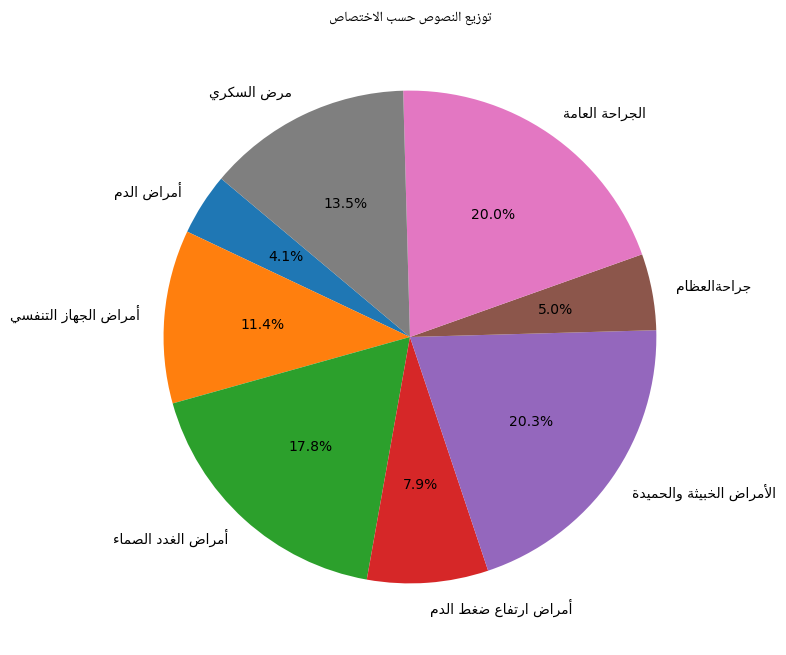

In [14]:
# # Drawing pie chart:



data = {
    'الاختصاص': ['أمراض الدم', 'أمراض الجهاز التنفسي', 'أمراض الغدد الصماء','أمراض ارتفاع ضغط الدم','الأمراض الخبيثة والحميدة','جراحةالعظام','الجراحة العامة','مرض السكري'],
    'عدد النصوص': [2153, 6002, 9417,4190,10711,2641,10548,7096]
}

data


df = pd.DataFrame(data)

# print(df)
arabic_font = FontProperties(fname='font/NotoNaskhArabic-VariableFont_wght.ttf') 

df['الاختصاص'] = [get_display(arabic_reshaper.reshape(label)) for label in df['الاختصاص']]
plt.figure(figsize=(8, 8))
plt.pie(df['عدد النصوص'], labels=df['الاختصاص'], autopct='%1.1f%%', startangle=140)
plt.title(get_display(arabic_reshaper.reshape('توزيع النصوص حسب الاختصاص')), fontproperties=arabic_font)
plt.show()

# import pandas as pd
# import matplotlib.pyplot as plt

# data = {
#     'Specialization': ['Blood Diseases', 'Respiratory System Diseases', 'Endocrine Diseases', 'Hypertension', 'Malignant and Benign Diseases', 'Orthopedic Surgery', 'General Surgery', 'Diabetes'],
#     'Number of Texts': [1398, 3676, 5752, 2537, 6449, 2211, 6307, 4268]
# }

# df = pd.DataFrame(data)

# print(df)

# plt.figure(figsize=(8, 8))
# plt.pie(df['Number of Texts'], labels=df['Specialization'], autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Texts by Specialization')
# plt.show()


## [2.2] 

In [15]:
def delete_repeated_letter(text):
    # cleaned_text = re.sub(r'(.)\1{2,}', r'\1', text)
    cleaned_text = re.sub(r'([^\w\s\.])\1+', r'\1', text)
    cleaned_text = re.sub(r'(\.\s*)\1+$', r'\1', cleaned_text)
    return cleaned_text

def handle_connected_words(tokenized):
    # Handle connected words with '-'
    result_tokens = []
    for token in tokenized:
        # Split connected words with '-'
        result_tokens.extend(token.split('-'))
    return result_tokens


def filter_text(list):
    list_of_phrases =[]
    all_tokens = []
    for sentence in list:
        tokenizer = RegexpTokenizer(r'\b\d+\b|\b[^\d\W_]{2,}\b|[^\d\W_]+(?:-[^\d\W_]+)?|\S')
        tokenized = tokenizer.tokenize(delete_repeated_letter(sentence))
        tokenized = handle_connected_words(tokenized)

        # Remove '-' and '/' and one-letter words from each token
        # cleaned_tokens = [token for token in tokenized if len(token) > 1 and token not in ['-', '/']]
        # cleaned_tokens = [token if len(token) > 1 or token == 'و' else '' for token in tokenized if token not in ['-', '/']]

        cleaned_tokens = [token if (token.isalpha() and len(token) > 1) or token == 'و' else '' for token in tokenized if token not in ['-', '/']]

        combined_phrase = ' '.join(cleaned_tokens)
        list_of_phrases.append(combined_phrase)

    for phrase in list_of_phrases:
        tokens = nltk.word_tokenize(phrase)
        all_tokens.append(tokens)
        
    return all_tokens



In [16]:
train_data_answers_list = train_data['answer'].values
answers = filter_text(train_data_answers_list)
flattened_answers = [item for sublist in answers for item in sublist]
print(len(flattened_answers))


1645245


In [17]:
train_data_questions_list = train_data['question'].values
questions = filter_text(train_data_questions_list)
flattened_quesions = [item for sublist in questions for item in sublist]
print(len(flattened_quesions))

801979


In [18]:
# حساب عدد الكلمات الكلي :
total_words_len = len(flattened_quesions) + len(flattened_answers)
print(total_words_len)

2447224


In [19]:
# حساب عدد الكلمات الفريدة :
total_unique_words=len(set(flattened_quesions+flattened_answers))
print("عدد الكلمات الفريدة:", total_unique_words)

عدد الكلمات الفريدة: 94614


## [2.3] 

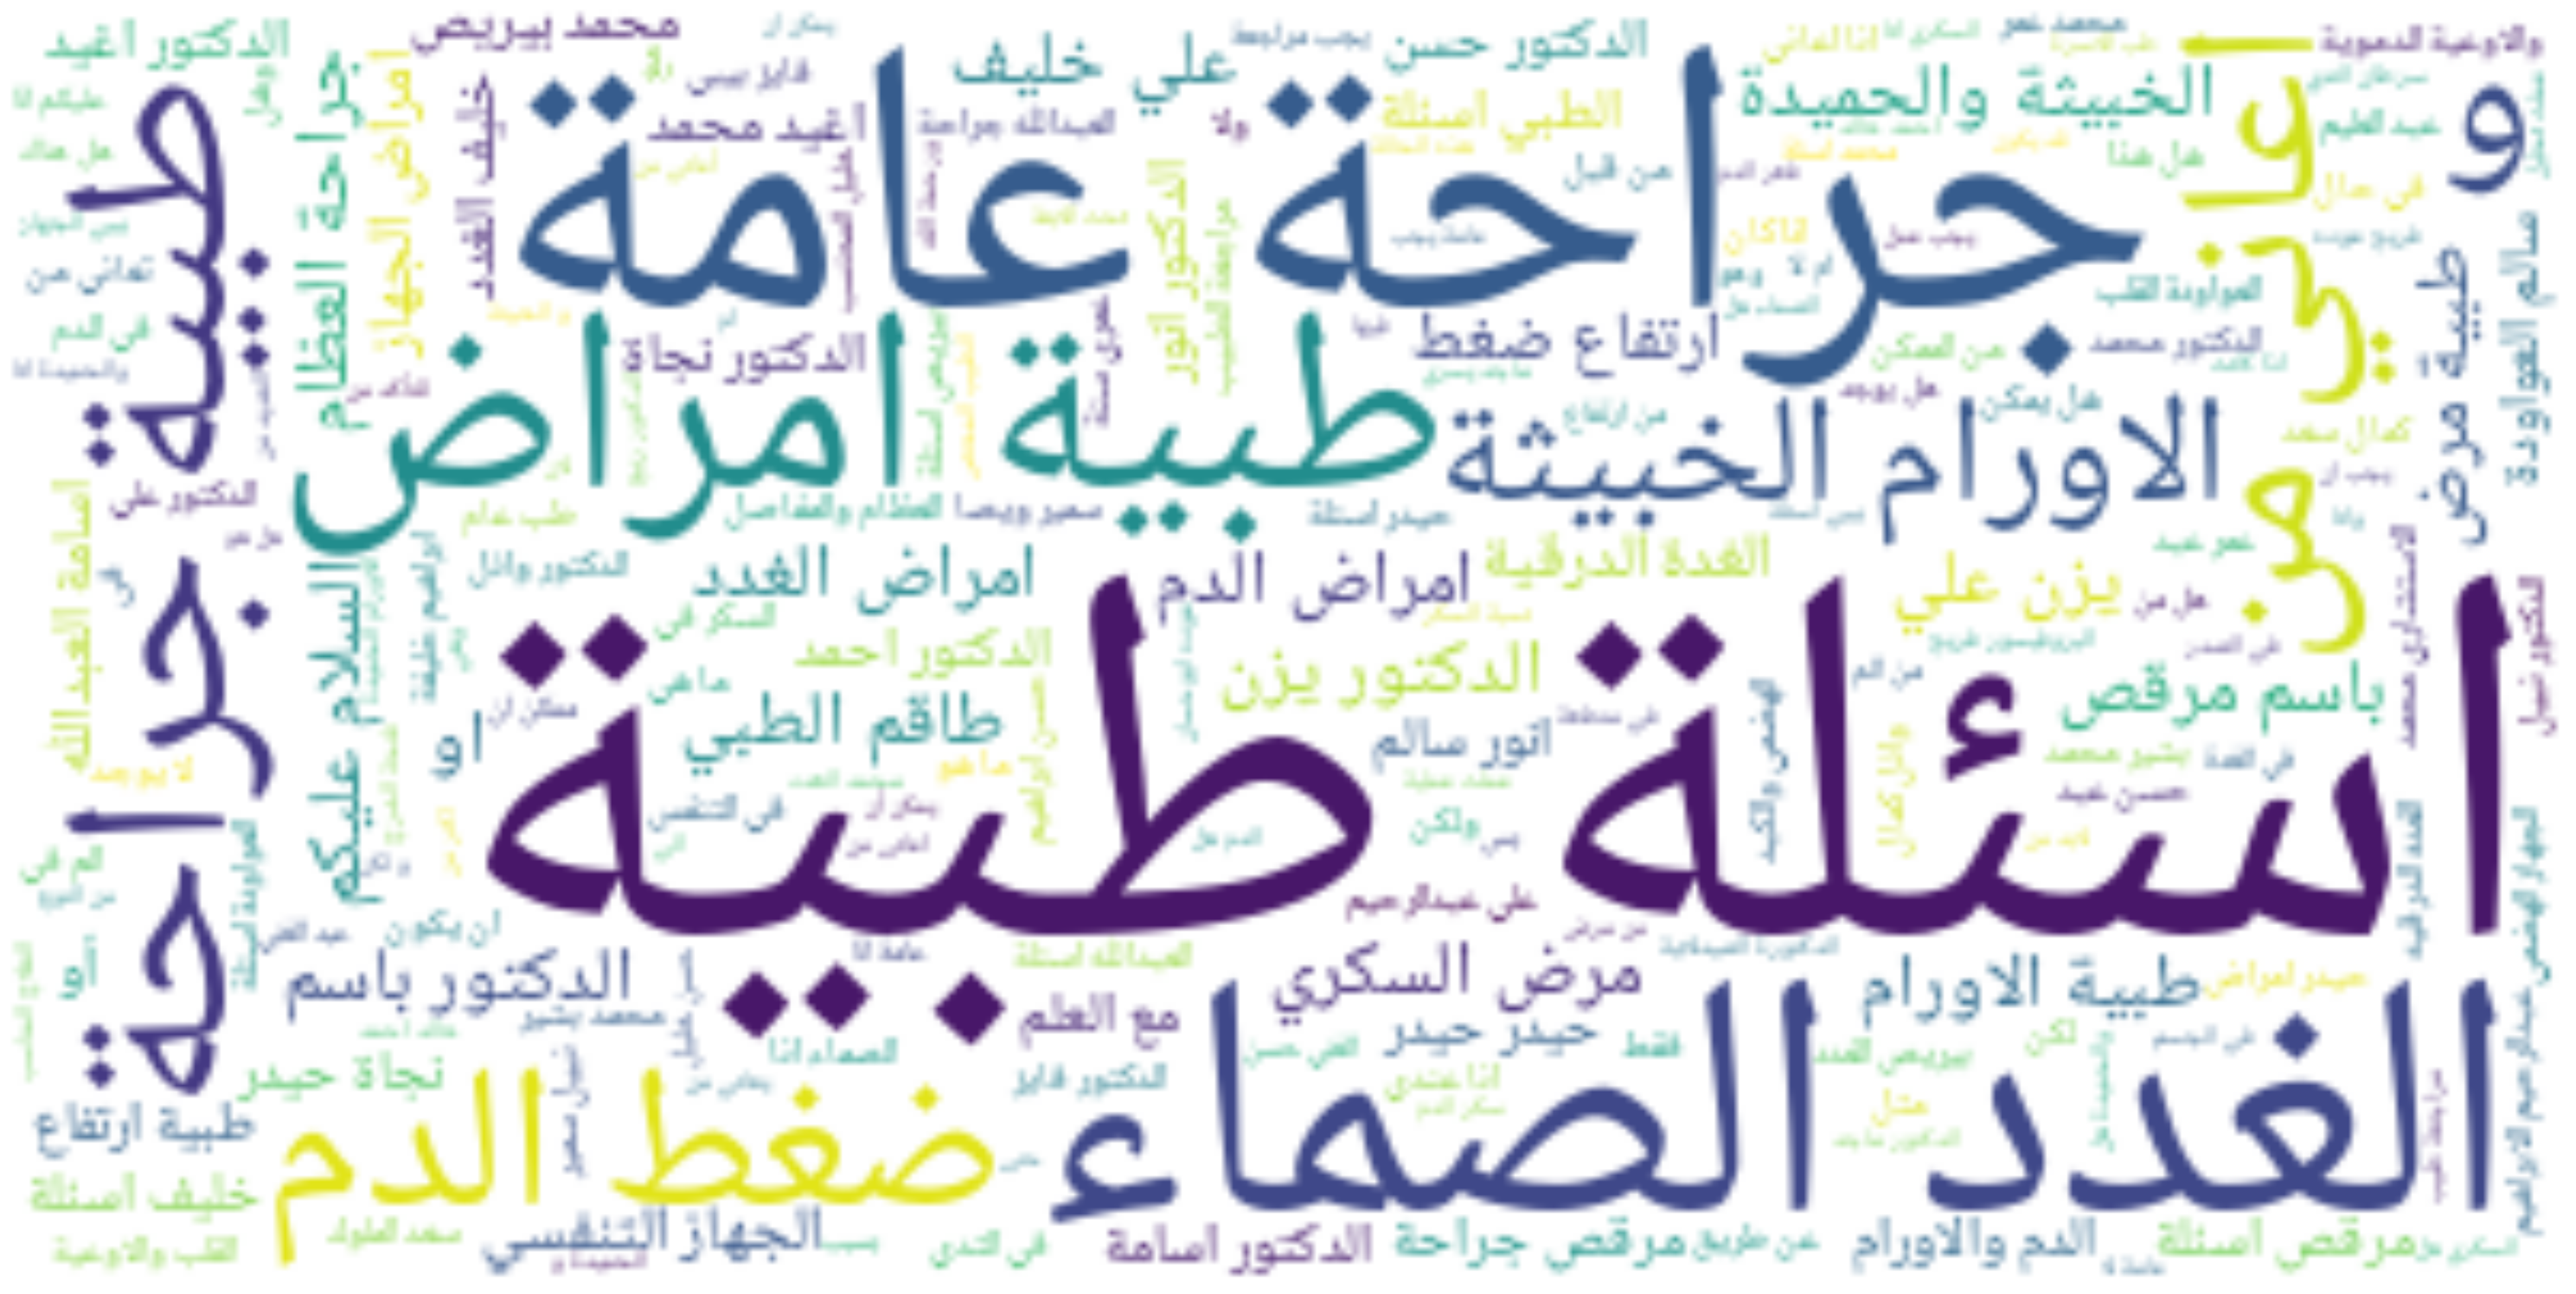

In [20]:
WCD=dict()
train_data_answers_list = flattened_answers
train_data_questions_list = flattened_quesions
train_data_list=train_data_answers_list+train_data_questions_list
answers_text = ' '.join(train_data_list)
reshaped_text = arabic_reshaper.reshape(answers_text)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='font/NotoNaskhArabic-VariableFont_wght.ttf', background_color='white').generate(arabic_text)
WCD=wordcloud.words_
plt.figure(figsize=(50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

يوجد بعض أحرف الجر و الأحرف و بعض الستوب ورد 

## [2.4] 

In [21]:
def tokenized_text(text):
    # allWords = nltk.tokenize.word_tokenize(text)

    allWordDist = nltk.FreqDist(w for w in text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in text if w not in stopwords)  
    mostCommon= allWordDist.most_common(15)
    print('أكثر 15 كلمة مكررة:',mostCommon)
    leastCommon = allWordDist.most_common()[:-11:-1]
    print('أقل 10 كلمة مكررة:', leastCommon)
    bigram_freq = nltk.FreqDist(bigrams(text))
    most_common_bigrams = bigram_freq.most_common(10)
    print('أكثر 10 ثنائيات مكررة في النص:',most_common_bigrams)
    trigram_freq = nltk.FreqDist(trigrams(text))
    most_common_trigrams = trigram_freq.most_common(10)
    print('أكثر 10 ثلاثيات كلمات مكررة في النص:',most_common_trigrams)
    collocations_bigram = nltk.collocations.BigramCollocationFinder.from_words(text)
    most_common_collocations_bigram = collocations_bigram.nbest(nltk.collocations.BigramAssocMeasures.likelihood_ratio, 10)
    print('أكثر 10 ثنائيات كلمات مهمة في النص:',most_common_collocations_bigram)
    collocations_trigram = nltk.collocations.TrigramCollocationFinder.from_words(text)
    most_common_collocations_trigram = collocations_trigram.nbest(nltk.collocations.TrigramAssocMeasures.likelihood_ratio, 10)
    print('أكثر 10 ثلاثيات كلمات مهمة في النص:',most_common_collocations_trigram)  
    print('========================================================================================================================================================================================')  


    


# tokenized_text('tony botros is tony the tony best best best tony botros in in in the whole world tony botros')
# tokenized_text(['طوني','طوني','بطرس','هو','طوني','هو','بطرس','ال','الأفضل'])
# tokenized_text(['لدي', 'جرح', 'فوق', 'حاجبي', 'و', 'تمت', 'عملية', 'الخياطة', 'ثم', 'نزع', 'الغرزات', 'بشكل', 'عادي', 'لكن', 'مر', 'اسبوع', 'على', 'ذلك', 'و', 'مازال', 'هناك', 'الم', 'و', 'تطلب', 'شديد', 'في', 'المنطقة', 'لدرجة', 'اني', 'لا', 'استطيع', 'رفع', 'حاجبي', 'ابدا', 'إضافة', 'لوجود', 'انتفاخ', 'هل', 'هدا', 'طبيعي', 'ام', 'يمكن', 'ان', 'يكون', 'خلل', 'و', 'إن', 'كان', 'كذلك', 'ما', 'هو'])
# tokenized_text(answers[0])

لقد استخدنا توابع جاهزه 
ال most_common 
بيجب اكتر 10 مكررين 
من أجل أقل عشرة أخدنا أخر عشرة من المصفوفة

In [22]:
# هاد التابع لمرق كل اختصاص وجيب منو الكلمات كلا متل مو مطلوب ب 2.4
def all_tokinized_text(specialized):
    filtered_questions = filter_text(train_data[train_data['label']==specialized]['question'].values)
    filtered_answers = filter_text(train_data[train_data['label']==specialized]['answer'].values)
    list = filtered_questions + filtered_answers
    flattened_list = [item for sublist in list for item in sublist]
    # flattened_list
    tokenized_text(flattened_list)
    

In [340]:
all_tokinized_text('أمراض الدم')

أكثر 15 كلمة مكررة: [('الدم', 3463), ('من', 2759), ('في', 2638), ('الدكتور', 1700), ('طبية', 1419), ('اسئلة', 1398), ('امراض', 1385), ('و', 1223), ('على', 924), ('هل', 883), ('ما', 664), ('ان', 631), ('لا', 605), ('عن', 524), ('أو', 511)]
أقل 10 كلمة مكررة: [('يستجعي', 1), ('رقمهم', 1), ('تستطيعين', 1), ('معهم', 1), ('بالتكلم', 1), ('متوافر', 1), ('ويقدم', 1), ('والمخاطر', 1), ('والاداء', 1), ('والكوادر', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 1398), (('امراض', 'الدم'), 1191), (('طبية', 'امراض'), 1153), (('الدكتور', 'فايز'), 474), (('فايز', 'بيبي'), 474), (('طاقم', 'الطبي'), 430), (('فقر', 'الدم'), 330), (('الجهاز', 'الهضمي'), 289), (('الهضمي', 'والكبد'), 267), (('في', 'الدم'), 247)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'امراض'), 1153), (('طبية', 'امراض', 'الدم'), 1044), (('الدكتور', 'فايز', 'بيبي'), 474), (('الجهاز', 'الهضمي', 'والكبد'), 267), (('فايز', 'بيبي', 'اسئلة'), 237), (('بيبي', 'اسئلة', 'طبية'), 237), (('فايز', 'بيبي', 'الجهاز'), 237), (('

In [341]:
all_tokinized_text('أمراض الجهاز التنفسي')

أكثر 15 كلمة مكررة: [('من', 7277), ('في', 6403), ('الدكتور', 4434), ('و', 3914), ('طبية', 3704), ('اسئلة', 3683), ('الجهاز', 3329), ('امراض', 3280), ('التنفسي', 2963), ('على', 2001), ('التنفس', 1785), ('مع', 1778), ('هل', 1733), ('صدرية', 1485), ('ان', 1377)]
أقل 10 كلمة مكررة: [('واعطس', 1), ('يستغني', 1), ('والدرجة', 1), ('cure', 1), ('الأجنبية', 1), ('بعدمح', 1), ('سريرى', 1), ('Eye', 1), ('eye', 1), ('بالغذاء', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 3676), (('طبية', 'امراض'), 2985), (('الجهاز', 'التنفسي'), 2899), (('امراض', 'الجهاز'), 2758), (('اعاني', 'من'), 1099), (('طاقم', 'الطبي'), 722), (('الدكتور', 'فايز'), 654), (('فايز', 'بيبي'), 652), (('في', 'التنفس'), 650), (('السلام', 'عليكم'), 548)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'امراض'), 2985), (('امراض', 'الجهاز', 'التنفسي'), 2755), (('طبية', 'امراض', 'الجهاز'), 2741), (('الدكتور', 'فايز', 'بيبي'), 651), (('طاقم', 'الطبي', 'اسئلة'), 361), (('الطبي', 'اسئلة', 'طبية'), 361), (('الجهاز', 'التن

In [342]:
all_tokinized_text('أمراض الغدد الصماء')

أكثر 15 كلمة مكررة: [('الدكتور', 8336), ('من', 8222), ('في', 7842), ('الغدد', 7332), ('الصماء', 6838), ('طبية', 5803), ('اسئلة', 5754), ('امراض', 4901), ('و', 4805), ('الغدة', 4208), ('هل', 3986), ('الدرقية', 3123), ('على', 3044), ('علي', 2949), ('محمد', 2629)]
أقل 10 كلمة مكررة: [('الولادةو', 1), ('فالعيش', 1), ('العده', 1), ('والكرياتين', 1), ('بانتضام', 1), ('tSH', 1), ('عمرهاتعاني', 1), ('والتضخم', 1), ('بوزنها', 1), ('تضرها', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('الغدد', 'الصماء'), 6825), (('اسئلة', 'طبية'), 5752), (('طبية', 'امراض'), 4561), (('امراض', 'الغدد'), 4275), (('الغدة', 'الدرقية'), 2448), (('الدكتور', 'يزن'), 1992), (('يزن', 'علي'), 1992), (('علي', 'خليف'), 1992), (('الدكتور', 'باسم'), 1496), (('باسم', 'مرقص'), 1496)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'امراض'), 4561), (('امراض', 'الغدد', 'الصماء'), 4269), (('طبية', 'امراض', 'الغدد'), 4264), (('الدكتور', 'يزن', 'علي'), 1992), (('يزن', 'علي', 'خليف'), 1992), (('الدكتور', 'باسم', 'مرقص'), 1496), (('ا

In [343]:
all_tokinized_text('ارتفاع ضغط الدم')

أكثر 15 كلمة مكررة: [('الدم', 5226), ('ضغط', 4867), ('من', 4757), ('في', 3732), ('الدكتور', 3729), ('ارتفاع', 3485), ('طبية', 2578), ('اسئلة', 2537), ('الضغط', 2421), ('على', 1897), ('و', 1880), ('القلب', 1625), ('هل', 1622), ('سالم', 1514), ('انور', 1481)]
أقل 10 كلمة مكررة: [('بالبيت', 1), ('التواجد', 1), ('تقسيمه', 1), ('للنشاط', 1), ('أنجح', 1), ('لمشاكل', 1), ('مضاعفه', 1), ('التحسن', 1), ('كثب', 1), ('والمراقبه', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('ضغط', 'الدم'), 4312), (('ارتفاع', 'ضغط'), 2758), (('اسئلة', 'طبية'), 2537), (('طبية', 'ارتفاع'), 1894), (('انور', 'سالم'), 1481), (('الدكتور', 'انور'), 1480), (('سالم', 'العواودة'), 1480), (('القلب', 'والاوعية'), 1204), (('والاوعية', 'الدموية'), 1204), (('العواودة', 'اسئلة'), 740)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('ارتفاع', 'ضغط', 'الدم'), 2698), (('اسئلة', 'طبية', 'ارتفاع'), 1894), (('طبية', 'ارتفاع', 'ضغط'), 1894), (('الدكتور', 'انور', 'سالم'), 1480), (('انور', 'سالم', 'العواودة'), 1480), (('القلب', 'والاوعية', 'الدموية'), 

In [344]:
all_tokinized_text('الأورام الخبيثة والحميدة')

أكثر 15 كلمة مكررة: [('الدكتور', 9848), ('من', 9634), ('في', 9528), ('طبية', 6479), ('اسئلة', 6451), ('الاورام', 5405), ('الخبيثة', 5224), ('و', 4940), ('والحميدة', 4718), ('هل', 4330), ('الدم', 3706), ('حيدر', 3328), ('على', 3106), ('امراض', 3071), ('الثدي', 2983)]
أقل 10 كلمة مكررة: [('قسوى', 1), ('نحاول', 1), ('إجبار', 1), ('إتباعه', 1), ('لضمان', 1), ('واستصئال', 1), ('واثبتت', 1), ('NA', 1), ('CREATININE', 1), ('ACID', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 6449), (('الاورام', 'الخبيثة'), 4730), (('الخبيثة', 'والحميدة'), 4717), (('طبية', 'الاورام'), 4716), (('باسم', 'مرقص'), 2584), (('الدكتور', 'باسم'), 2578), (('امراض', 'الدم'), 2327), (('الدم', 'والاورام'), 2230), (('جراحة', 'عامة'), 2187), (('الدكتور', 'نجاة'), 1658)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'الاورام'), 4716), (('طبية', 'الاورام', 'الخبيثة'), 4716), (('الاورام', 'الخبيثة', 'والحميدة'), 4716), (('الدكتور', 'باسم', 'مرقص'), 2578), (('امراض', 'الدم', 'والاورام'), 2230), (('الدكتور'

In [345]:
all_tokinized_text('جراحة العظام')

أكثر 15 كلمة مكررة: [('جراحة', 3569), ('العظام', 3474), ('في', 3465), ('من', 3432), ('الدكتور', 2790), ('طبية', 2237), ('اسئلة', 2212), ('و', 1733), ('والمفاصل', 1495), ('هل', 1122), ('على', 1108), ('انا', 877), ('مع', 724), ('لا', 722), ('الم', 673)]
أقل 10 كلمة مكررة: [('فيستحسن', 1), ('ومسكنة', 1), ('خصائص', 1), ('للتقليل', 1), ('والساخنة', 1), ('والمتعبة', 1), ('والحد', 1), ('فإنها', 1), ('للنتوءات', 1), ('ومخاطر', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('جراحة', 'العظام'), 3290), (('اسئلة', 'طبية'), 2211), (('طبية', 'جراحة'), 1894), (('العظام', 'والمفاصل'), 1378), (('البروفيسور', 'فريح'), 598), (('فريح', 'عوده'), 598), (('عوده', 'ابوحسان'), 598), (('طاقم', 'الطبي'), 540), (('الدكتور', 'احمد'), 510), (('اعاني', 'من'), 474)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'جراحة'), 1894), (('طبية', 'جراحة', 'العظام'), 1816), (('جراحة', 'العظام', 'والمفاصل'), 1374), (('البروفيسور', 'فريح', 'عوده'), 598), (('فريح', 'عوده', 'ابوحسان'), 598), (('الدكتور', 'احمد', 'اسامة'), 418), 

In [346]:
all_tokinized_text('جراحة عامة')

أكثر 15 كلمة مكررة: [('من', 10187), ('جراحة', 9695), ('عامة', 9026), ('الدكتور', 8290), ('في', 8193), ('طبية', 6340), ('اسئلة', 6312), ('و', 5355), ('هل', 3324), ('على', 2957), ('لا', 2494), ('مع', 2447), ('بعد', 2439), ('او', 2383), ('انا', 2235)]
أقل 10 كلمة مكررة: [('بافراازات', 1), ('لوتتسبب', 1), ('تجاهلها', 1), ('رؤيته', 1), ('بلاذما', 1), ('اشهرالجرح', 1), ('وصبغة', 1), ('ورايت', 1), ('تاما', 1), ('اختلافا', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('جراحة', 'عامة'), 9002), (('اسئلة', 'طبية'), 6307), (('طبية', 'جراحة'), 4841), (('الدكتور', 'اسامة'), 1628), (('اسامة', 'العبدالله'), 1614), (('اعاني', 'من'), 1325), (('السلام', 'عليكم'), 923), (('العبدالله', 'اسئلة'), 807), (('العبدالله', 'جراحة'), 807), (('الدكتور', 'حسن'), 766)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'جراحة'), 4841), (('طبية', 'جراحة', 'عامة'), 4684), (('الدكتور', 'اسامة', 'العبدالله'), 1614), (('اسامة', 'العبدالله', 'اسئلة'), 807), (('العبدالله', 'اسئلة', 'طبية'), 807), (('اسامة', 'العبدالله', 'جراح

In [347]:
all_tokinized_text('مرض السكري')

أكثر 15 كلمة مكررة: [('من', 7463), ('السكري', 6297), ('في', 5747), ('الدكتور', 5524), ('السكر', 4984), ('مرض', 4595), ('طبية', 4296), ('اسئلة', 4271), ('و', 3465), ('علي', 2922), ('هل', 2845), ('على', 2770), ('يزن', 2314), ('خليف', 2294), ('الدم', 2215)]
أقل 10 كلمة مكررة: [('نلجا', 1), ('قراءاته', 1), ('فحصين', 1), ('إجراءه', 1), ('حرارى', 1), ('المتوسطة', 1), ('ممن', 1), ('يستحب', 1), ('الأياف', 1), ('مثله', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 4268), (('مرض', 'السكري'), 3955), (('طبية', 'مرض'), 3225), (('الدكتور', 'يزن'), 2296), (('يزن', 'علي'), 2294), (('علي', 'خليف'), 2294), (('الغدد', 'الصماء'), 1951), (('خليف', 'اسئلة'), 1147), (('خليف', 'الغدد'), 1147), (('طاقم', 'الطبي'), 846)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'مرض'), 3225), (('طبية', 'مرض', 'السكري'), 3225), (('الدكتور', 'يزن', 'علي'), 2294), (('يزن', 'علي', 'خليف'), 2294), (('علي', 'خليف', 'اسئلة'), 1147), (('خليف', 'اسئلة', 'طبية'), 1147), (('علي', 'خليف', 'الغدد'), 1147), (('خليف'

In [348]:
# على كل الداتا تبع الترين:
filtered_questions = filter_text(train_data['question'].values)
filtered_answers = filter_text(train_data['answer'].values)
list = filtered_questions + filtered_answers
flattened_list = [item for sublist in list for item in sublist]
flattened_list
tokenized_text(flattened_list)


أكثر 15 كلمة مكررة: [('من', 53731), ('في', 47548), ('الدكتور', 44651), ('طبية', 32856), ('اسئلة', 32618), ('و', 27315), ('جراحة', 20023), ('هل', 19845), ('الدم', 18946), ('على', 17807), ('امراض', 14809), ('عامة', 14630), ('لا', 13177), ('الغدد', 12601), ('مع', 12048)]
أقل 10 كلمة مكررة: [('قسوى', 1), ('إجبار', 1), ('إتباعه', 1), ('ومسكنة', 1), ('والمتعبة', 1), ('للنتوءات', 1), ('خياراتها', 1), ('Spurs', 1), ('بافراازات', 1), ('لوتتسبب', 1)]
أكثر 10 ثنائيات مكررة في النص: [(('اسئلة', 'طبية'), 32598), (('جراحة', 'عامة'), 14448), (('الغدد', 'الصماء'), 11130), (('طبية', 'امراض'), 10883), (('طبية', 'جراحة'), 8607), (('ضغط', 'الدم'), 6735), (('اعاني', 'من'), 6247), (('الاورام', 'الخبيثة'), 6106), (('الخبيثة', 'والحميدة'), 6091), (('طبية', 'الاورام'), 6089)]
أكثر 10 ثلاثيات كلمات مكررة في النص: [(('اسئلة', 'طبية', 'امراض'), 10883), (('اسئلة', 'طبية', 'جراحة'), 8607), (('اسئلة', 'طبية', 'الاورام'), 6089), (('طبية', 'الاورام', 'الخبيثة'), 6089), (('الاورام', 'الخبيثة', 'والحميدة'), 6089), (('طب

## [2.5] 

In [23]:
train_data['all_word']=train_data['answer']+train_data['question']
train_data_list=train_data['all_word'].values
all_word = filter_text(train_data_list)

In [350]:
flattened_all_word = [item for sublist in all_word for item in sublist]
train_data['length_of_sentinse']=train_data['all_word'].apply(len)
# train_data['length_of_sentinse']

In [24]:
w=[]
for i in all_word:
    w.append(set(i))
train_data['unique_words']=w
train_data['number_of_unique_words']=train_data['unique_words'].apply(len)

In [25]:
def histogram(length_of_sentinse,number_of_unique_words):
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    # plt.bar(number_of_unique_words, length_of_sentinse, color='blue', alpha=0.7)
    plt.hist(length_of_sentinse, label='length_of_sentinse',edgecolor='black', linewidth=1.2,bins=30, alpha=0.5)
    plt.hist(number_of_unique_words, label='number_of_unique_words',edgecolor='black', linewidth=1.2,bins=30, alpha=0.5)
    plt.title('histogram')
    plt.xlabel('length_of_sentinse')
    plt.ylabel('number_of_unique_words')
    # plt.tight_layout()
    plt.legend()
    plt.show()

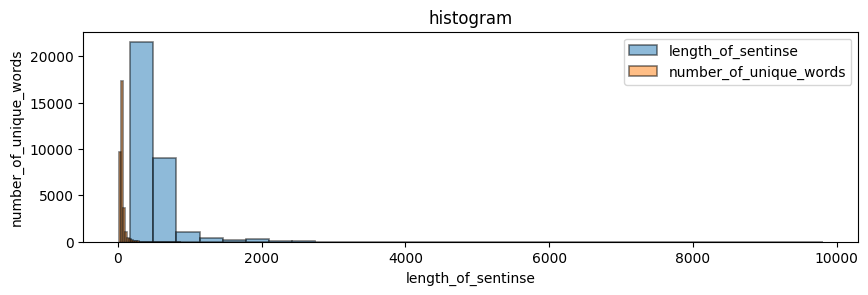

In [354]:
# لكل النص
histogram(train_data['length_of_sentinse'],train_data['number_of_unique_words'])

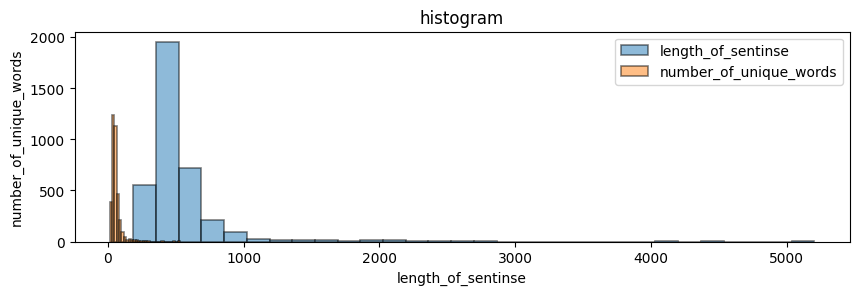

In [355]:
# أمراض الجهاز التنفسي
histogram(train_data[train_data['label']=='أمراض الجهاز التنفسي']['length_of_sentinse'],train_data[train_data['label']=='أمراض الجهاز التنفسي']['number_of_unique_words'])

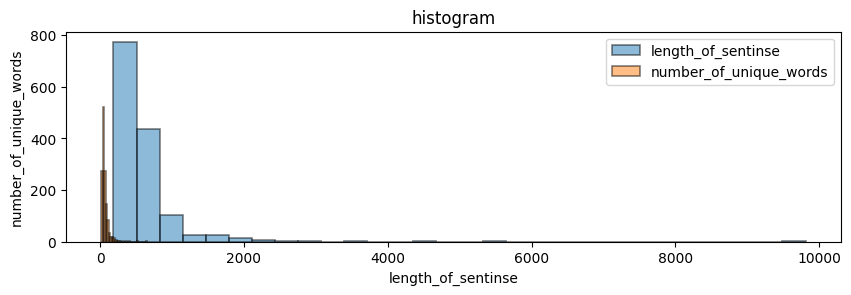

In [356]:
# أمراض الدم
histogram(train_data[train_data['label']=='أمراض الدم']['length_of_sentinse'],train_data[train_data['label']=='أمراض الدم']['number_of_unique_words'])

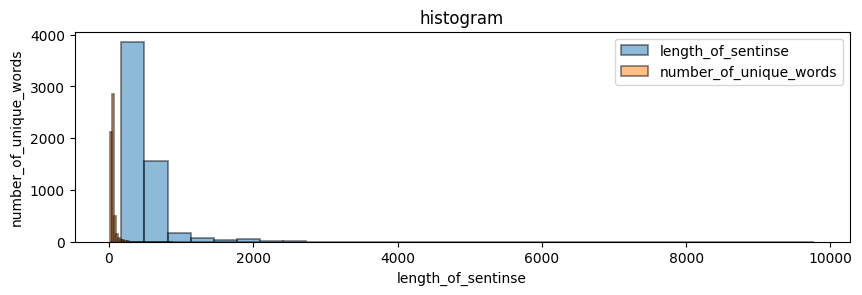

In [357]:
# أمراض الغدد الصماء
histogram(train_data[train_data['label']=='أمراض الغدد الصماء']['length_of_sentinse'],train_data[train_data['label']=='أمراض الغدد الصماء']['number_of_unique_words'])

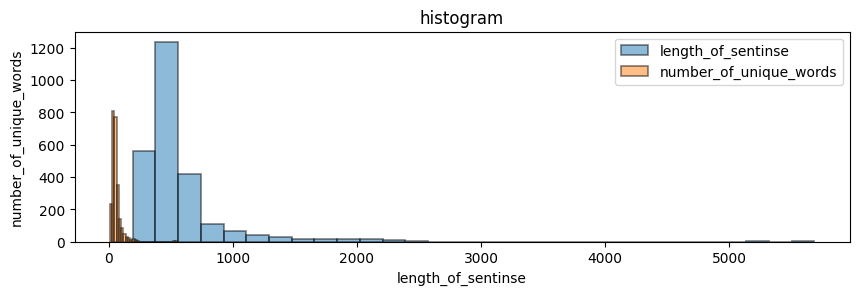

In [358]:
# ارتفاع ضغط الدم
histogram(train_data[train_data['label']=='ارتفاع ضغط الدم']['length_of_sentinse'],train_data[train_data['label']=='ارتفاع ضغط الدم']['number_of_unique_words'])

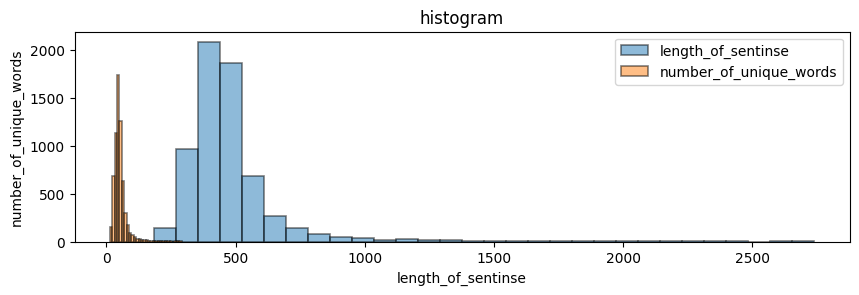

In [359]:
# الأورام الخبيثة والحميدة
histogram(train_data[train_data['label']=='الأورام الخبيثة والحميدة']['length_of_sentinse'],train_data[train_data['label']=='الأورام الخبيثة والحميدة']['number_of_unique_words'])

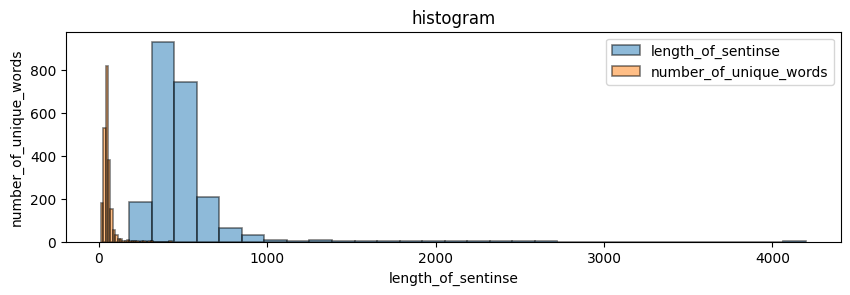

In [360]:
# جراحة العظام
histogram(train_data[train_data['label']=='جراحة العظام']['length_of_sentinse'],train_data[train_data['label']=='جراحة العظام']['number_of_unique_words'])

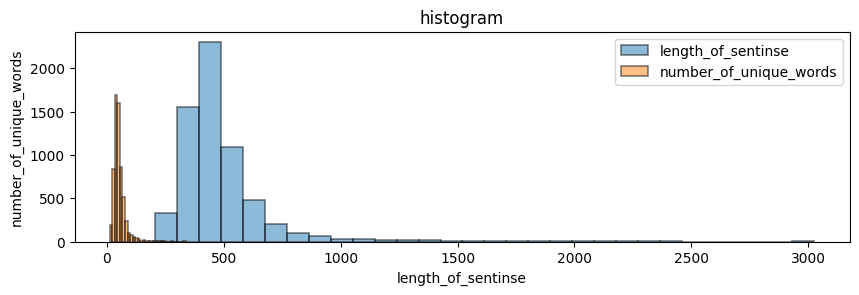

In [361]:
# جراحة عامة
histogram(train_data[train_data['label']=='جراحة عامة']['length_of_sentinse'],train_data[train_data['label']=='جراحة عامة']['number_of_unique_words'])

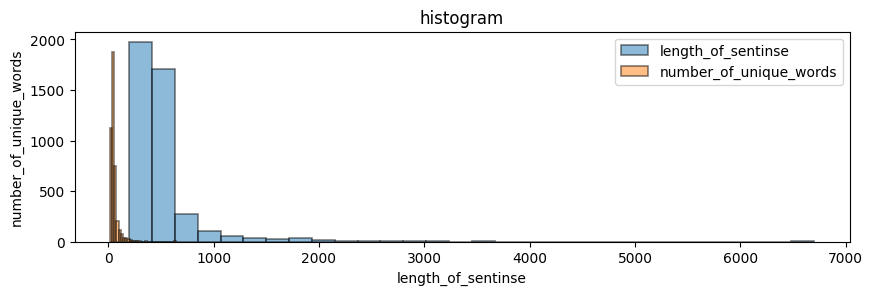

In [362]:
# مرض السكري
histogram(train_data[train_data['label']=='مرض السكري']['length_of_sentinse'],train_data[train_data['label']=='مرض السكري']['number_of_unique_words'])

أنه لايمكن التفريق بين الاختصاصات عن طريق عدد الكلمات الفريده 

# Question [3]: Text Cleaning and Normalization

## [3.1] 


In [26]:
# train_data
# clean_tweet = re.sub(r'^RT(\s)+|https?\S+|#|@\S+', '', tweet) ## من أجل أزالت 
#r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
def remove_links(text):
    clean_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    return clean_text


In [28]:
texts = train_data[train_data['label']=='أمراض الدم']['question']
for text in texts[:5]:
    # print(text)
    print(remove_links(text))


ما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 

السلام عليكم انا شاب 25 سنه وظهرلي زي كوره من فتحت الشرج وهي تولمني الان ارجو حل فوري لاني مش مستحمل الالم وكمان عامل عمليه حاليا في كتفي مركب وديما قاعد فعاوز حل سريع وشكرا 

ما هي الفحوص الروتينية للسكريين؟ 

لدي ارتفاع بظغط الدم 140/100
علما اجريت فحص gue -hb-pcv - lipid profil
وكان جميع النتائج ضمن المعدل الطبيعي
وقال لي الكبيب ان اخذ دواء املودبين 5 ملغ يوميا


تكون حبة صغيرةتحت الجلد بدون ألم ولا شيء بحجم صغير 


## [3.2] 

In [29]:
import re

def remove_doctors_prefix(text):
    pattern = r'\b(?:الدكتور(?:ة)?)\s+(?:الصيدلاني(?:ة)?)?\s*(?:([\u0600-\u06FF]+)\s*[\u0600-\u06FF]+\s*([\u0600-\u06FF]+))\b'

    def replacer(match):
        full_name = match.group(1)
        first_name = full_name.split()[0]
        return f'د.{first_name}'

    result = re.sub(pattern, replacer, text)

    return result


In [30]:
texts = train_data[train_data['label']=='أمراض الدم']['answer']
# texts.apply(remove_doctors_prefix)[0]
for text in texts[:5]:
    # print(text)
    print(remove_doctors_prefix(text))
    print("=================================================================")



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


د.يزن







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

د.يزن 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل 3 شهور (تصل الى 6 شهور اذا كانت التحاليل جيدة) سكر تراكمى كل 3 شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر 3 شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 6 شهور لمتابعة حالة الشبكية و 

## [3.3] 

In [32]:
def remove_sentences_after_doctor(text):
    result = re.sub(r'(الدكتور(?:ة)[^\n]*\n|د\.[^\n]*\n)([^\n]*\n){0,6}', r'\1', text)
    return result

for text in texts[:5]:
    print(remove_sentences_after_doctor(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل 3 شهور (تصل الى 6 شهور اذا كانت التحاليل جيدة) سكر تراكمى كل 3 شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر 3 شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 

In [33]:
def remove_sentences_after_doctor(text):
    text_without_empty_lines = re.sub(r'\n\s*\n', '\n', text)
    lines = text_without_empty_lines.splitlines()
    lines.pop()
    new_text = '\n'.join(lines)   
    return new_text

for text in texts[:100]:
    print(remove_sentences_after_doctor(text))
    print("/////////////////////////////////////////////")


لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51
الدكتور يزن علي خليف
/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157
الدكتور يزن علي خليف 
/////////////////////////////////////////////

لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49
الاستشاري محمد عمر عبد العليم
/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795
الاستشاري محمد عمر عبد العليم 
/////////////////////////////////////////////

الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل 3 شهور (تصل الى 6 شهور اذا كانت التحاليل جيدة) سكر تراكمى كل 3 شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر 3 شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما 

## [3.4] 

In [34]:
def remove_duplicate_letters_except_alif(text):
    pattern = re.compile(r'(?:(?<!ا)ا(?!ا)|(.)(?:\1)+)', re.UNICODE) # بشلي كلشي أحرف مكررة وخاصة الألف مابكررها اكتر من مرة
    result = pattern.sub(lambda x: x.group(1) if x.group(1) else 'ا', text)
    return result

for text in texts[:5]:
    print(remove_duplicate_letters_except_alif(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-ميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-35157

الدكتور يزن علي خليف 


الغد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل 3 شهور (تصل الى 6 شهور اذا كانت التحاليل جيدة) سكر تراكمى كل 3 شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر 3 شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 6 شه

## [3.5]

### [3.5.1] 

In [35]:
# هاد بيقلب لل 1و2و3و4و....
def convert_numbers_to_arabic_v2(text):
    digit_mapping = {'٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4', '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'}
    english_text = re.sub(r'[٠-٩]', lambda x: digit_mapping[x.group()], text)

    return english_text


for text in texts[:5]:
    print(convert_numbers_to_arabic_v2(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
1
2015-01-04 20:08:51


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
0
2018-08-24 23:19:49


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-1216795

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل 3 شهور (تصل الى 6 شهور اذا كانت التحاليل جيدة) سكر تراكمى كل 3 شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر 3 شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 

In [36]:
# هاد بيلقلب لل ١,٢,٣,٤
def convert_numbers_to_arabic(text):
    digit_mapping = {'0': '٠', '1': '١', '2': '٢', '3': '٣', '4': '٤', '5': '٥', '6': '٦', '7': '٧', '8': '٨', '9': '٩'}
    arabic_text = re.sub(r'[0-9]', lambda x: digit_mapping[x.group()], text)

    return arabic_text


for text in texts[:5]:
    print(convert_numbers_to_arabic(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
١
٢٠١٥-٠١-٠٤ ٢٠:٠٨:٥١


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-٣٥١١٥٧

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
٠
٢٠١٨-٠٨-٢٤ ٢٣:١٩:٤٩


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-١٢١٦٧٩٥

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل ٣ شهور (تصل الى ٦ شهور اذا كانت التحاليل جيدة) سكر تراكمى كل ٣ شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر ٣ شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل 

### [3.5.2] 

In [37]:
def standardize_numbers(text, replacement_symbol='T'):
    digit_pattern = r'[0-9٠-٩]+'
    standardized_text = re.sub(digit_pattern, lambda x: replacement_symbol, text)

    return standardized_text


for text in texts[:5]:
    print(standardize_numbers(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له
T
T-T-T T:T:T


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-T

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص
T
T-T-T T:T:T


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-T

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل T شهور (تصل الى T شهور اذا كانت التحاليل جيدة) سكر تراكمى كل T شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر T شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل T شهور لمتابعة حالة الشبكية

### [3.5.3] 

In [38]:
def remove_numbers(text):
    digit_pattern = r'\d+'
    
    text_without_numbers = re.sub(digit_pattern, '', text)

    return text_without_numbers

for text in texts[:5]:
    print(remove_numbers(text))



لكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له

-- ::


الدكتور يزن علي خليف







/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-

الدكتور يزن علي خليف 


الغدد الصماء 





لا يمكن الإجابة على هذا السؤال بدون فحص يجب الفحص

-- ::


الاستشاري محمد عمر عبد العليم







/اسئلة-طبية/جراحة-عامة/انا-وظهرلي-زي-كوره-من-فتحت-الشرج-وهي-تولمني-الان-حل-

الاستشاري محمد عمر عبد العليم 


جراحة عامة 





الرد النموذجى صعب تحقيقه لكن على الأقل يجب عمل فحص لوظائف الكلى كل  شهور (تصل الى  شهور اذا كانت التحاليل جيدة) سكر تراكمى كل  شهور (ضرورى جدا لمعرفة متوسط معدل السكر بالدم خلال اخر  شهور), تحليل صورة الدهون كاملة بالدم (لمعرفة نسبة الدهون الثلالثية و الدهون السيئة بالدم بالاضافة الى الكوليسترول), صورة الدم و تحليل وظائف الكبد و تحليل بول بشكل دورى (مرضى السكرى عرضة أكثر لحدوث التهابات بالمسالك), كما أنه من المهم زيارة طبيب الرمد كل  شهور لمتابعة حالة الشبكية و العين عموما.
يضاف 

### [3.5.4]

In [39]:
texts = train_data[train_data['label']=='أمراض الجهاز التنفسي']['answer'].values

def remove_dates_and_times(text):
    date_time_patterns = [
        r'\d{4}-\d{2}-\d{2}\s+\d{1,2}:\d{2}:\d{2}'  # Match dates and times like 2015-01-04 20:08:51
        # r'\d{1,2}/\d{1,2}/\d{2,4}',         # Match dates like 12/31/2022
        # r'\d{1,2}-\d{1,2}-\d{2,4}',         # Match dates like 12-31-2022
        # r'\d{1,2}:\d{2}:\d{2}'               # Match times like 12:34:56
        # r'\d{1,2}\s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s*\d{2,4}',  # Match dates like 31 Dec 2022
        # r'\d{1,2}:\d{2}\s*(?:AM|PM|am|pm)?',  # Match times like 12:34 AM
    ]

    for pattern in date_time_patterns:
        text = re.sub(pattern, '', text)

    return text

for text in texts[:5]:
    print(remove_dates_and_times(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0



الدكتور حسن ابراهيم خليفة







/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059

الدكتور حسن ابراهيم خليفة 


جراحة عامة 





لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح
1



الدكتور اسامة العبدالله







/اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406

الدكتور اسامة العبدالله 


جراحة عامة 





اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0



د. سوزان الحسنين







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184

د. سوزان الحسنين 


الاورام الحميدة و الخبيثة 





بعد تمام البلوغ لايحدث نمو فى الطول
1



الدكتور احمد اسامة عبدالغنى صقر







/اسئلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قصيرة-القامة-من-الطول-سم-هل-525552

الدكتور احمد اسامة عبدالغنى صقر 


جراحة ا

## [3.6] 

### [3.6.1] 

In [375]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def remove_punctuation(text):
    text=re.sub(r'[!\"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~،؛؟ـ]',' ',text)
    return text

for text in texts[:5]:
    print(remove_punctuation(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0
2023 06 17 05 56 49


الدكتور حسن ابراهيم خليفة







 اسئلة طبية جراحة عامة عملت عملية دوالي الساقين قسطرة الليزر من شهر وعندي 1715059

الدكتور حسن ابراهيم خليفة 


جراحة عامة 





لا يوحد مشكلة بالمشي  الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح
1
2018 03 13 08 07 00


الدكتور اسامة العبدالله







 اسئلة طبية جراحة عامة عملت عن البواسير شهر وعانيت خلال التبرز كثيرا حدث لي 1113406

الدكتور اسامة العبدالله 


جراحة عامة 





اوافق على راي د  محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0
2022 08 13 10 24 38


د  سوزان الحسنين







 اسئلة طبية الاورام الخبيثة والحميدة حدث معي قبل او شيء ك تنميل في الوجه وفي اليد وبعده 1610184

د  سوزان الحسنين 


الاورام الحميدة و الخبيثة 





بعد تمام البلوغ لايحدث نمو فى الطول
1
2015 08 29 20 56 25


الدكتور احمد اسامة عبدالغنى صقر







 اسئلة طبية جراحة العظام انا بنت و لدي مشكلة هي انني قص

### [3.6.2] 

In [41]:
def keep_arabic_punctuations_numbers(text):
    text= re.sub(r'[^\u0600-\u06FF0-9،؛؟ـ!\"#$%&\'()*+,\-./:;<=>?@\[\\\]^_`{|}~]', ' ', text)
    return text

for text in texts[:5]:
    print(keep_arabic_punctuations_numbers(text))

    راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء  0  2023-06-17 05:56:49      الدكتور حسن ابراهيم خليفة                /اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059    الدكتور حسن ابراهيم خليفة       جراحة عامة       
    لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح  1  2018-03-13 08:07:00      الدكتور اسامة العبدالله                /اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406    الدكتور اسامة العبدالله       جراحة عامة       
    اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم   0  2022-08-13 10:24:38      د. سوزان الحسنين                /اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184    د. سوزان الحسنين       الاورام الحميدة و الخبيثة       
    بعد تمام البلوغ لايحدث نمو فى الطول  1  2015-08-29 20:56:25      الدكتور احمد اسامة

## [3.7] 

In [42]:
stop_word=set(stop_words.classed_stopwords_list())
Some_stop_words_we_need=["قبلما","بعدما","فقط","مازال","ليست","ليس","ليسا","لسنا",
                         "لسن","لازالت","مساء","صباح","قبل","بعد","إياك","إياكن",
                         "إياكما","إياكم","لم","عدا","إلا","د","كلا","عامة","لا",
                         "حبذا","أقل","أكثر"]
Some_stop_words_dont_we_need=['عليكم','السلام','انا','أرجو','الرد','المزيد','إقرأ']
for word in Some_stop_words_we_need:
    if word in stop_word:
        stop_word.remove(word)

for word in Some_stop_words_we_need:
    if word is not stop_word:
        stop_word.add(word)

def remove_stop_words(text):
    text =re.sub("[\_\-\/]"," ",text)
    text=word_tokenize(text)
    text=[w for w in text if not w in stop_word]
    return text

for text in texts[:5]:
    print(remove_stop_words(text))

['راجع', 'طبيبك', 'اجري', 'الجراحه', 'افضل', 'يجيب', 'لانه', 'شاهد', 'الحاله', 'علي', 'وضعها', 'الاول', 'وهوا', 'بلفعل', 'تمنياتي', 'بلشفاء', '0', '2023', '06', '17', '05:56:49', 'الدكتور', 'حسن', 'ابراهيم', 'خليفة', 'اسئلة', 'طبية', 'جراحة', 'عملت', 'عملية', 'دوالي', 'الساقين', 'قسطرة', 'الليزر', 'وعندي', '1715059', 'الدكتور', 'حسن', 'ابراهيم', 'خليفة', 'جراحة']
['يوحد', 'مشكلة', 'بالمشي', '.', 'الاكثار', 'شرب', 'السوائل', 'وممكن', 'استخدام', 'الملينات', 'والمغاطس', 'الدافئة', 'الملح', '1', '2018', '03', '13', '08:07:00', 'الدكتور', 'اسامة', 'العبدالله', 'اسئلة', 'طبية', 'جراحة', 'عملت', 'البواسير', 'وعانيت', 'التبرز', 'كثيرا', 'حدث', '1113406', 'الدكتور', 'اسامة', 'العبدالله', 'جراحة']
['اوافق', 'راي', 'محمدالشيخ', 'ايضا', 'ارجو', 'مراجعة', 'طبيب', 'الباطني', 'لضبط', 'السكر', 'بالدم', '0', '2022', '08', '13', '10:24:38', '.', 'سوزان', 'الحسنين', 'اسئلة', 'طبية', 'الاورام', 'الخبيثة', 'والحميدة', 'حدث', 'معي', 'او', 'شيء', 'تنميل', 'الوجه', 'وفي', 'اليد', 'وبعده', '1610184', '.', 'سوز

ملاحــــــــــــــــــظه


## [3.8] 

In [379]:
# def stem_arabic_words_farasa(text):
#     stemmer = FarasaStemmer()
#     text=stemmer.stem(text)
#     return text

# # text = "الكتب في المكتبة متنوعة ومفيدة"
# # stemmed_text = stem_arabic_words_farasa(text)
# # print(stemmed_text)

In [380]:
# def stem_arabic_words_tashaphyne(text):
#     stemmer = ArabicLightStemmer()
#     words = text.split()
#     stemmed_words = [stemmer.light_stem(word) for word in words]
#     return ' '.join(stemmed_words)

# # text = "الكتب في المكتبة متنوعة ومفيدة"
# # stemmed_text = stem_arabic_words_tashaphyne(text)
# # print(stemmed_text)

In [381]:
# def stem_arabic_words_ISRIStemmer(text):
#     stemmer = ISRIStemmer()
#     words = text.split()
#     stemmed_words = [stemmer.stem(word) for word in words]
#     return ' '.join(stemmed_words)

# # text = "الكتب في المكتبة متنوعة ومفيدة"
# # stemmed_text = stem_arabic_words_ISRIStemmer(text)
# # print(stemmed_text)

In [46]:
def stem_arabic_words_snowballstemmer(text):
    ar_stemmer = stemmer("arabic")
    words = text.split()
    stemmed_words = [ar_stemmer.stemWord(word) for word in words]
    return ' '.join(stemmed_words)

# text = "الكتب في المكتبة متنوعة ومفيدة"
# stemmed_text = stem_arabic_words_snowballstemmer(text)
# print(stemmed_text)

In [383]:
for text in texts[:5]:
    print(stem_arabic_words_snowballstemmer(text))

راجع طبيب من اجر جراحه افضل من يجيب لان شاهد حاله عل وضع اول وهو من قام لفعل تمنيات لشفاء 0 2023-06-17 05:56:49 دكتور حسن ابراهيم خليف /اسيلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059 دكتور حسن ابراهيم خليف جراح عام
لا يوحد مشكل مشي. اكثار من شرب سوايل ومم استخدام ملين والمغاطس دافء مع ملح 1 2018-03-13 08:07:00 دكتور اسام عبدالله /اسيلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406 دكتور اسام عبدالله جراح عام
اوافق علي را د/ محمدالشيخ و ايض ارجو مراجع طبيب باطن لضبط سكر بالدم 0 2022-08-13 10:24:38 د. سوزان حسن /اسيلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184 د. سوزان حسن اورام حميد و خبيث
بعد تمام بلوغ لايحدث نمو في طول 1 2015-08-29 20:56:25 دكتور احمد اسام عبدالغني صقر /اسيلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قصيرة-القامة-من-الطول-سم-هل-525552 دكتور احمد اسام عبدالغني صقر جراح عظام والمفاصل
ليس خطير لكن يتوافق مع نقص في يتام ب 12 0 2016-04-12 08:18:38 دكتور اسماعي

In [384]:
# for text in texts[:5]:
#     print(stem_arabic_words_tashaphyne(text))

In [385]:
# for text in texts[:5]:
#     print(stem_arabic_words_farasa(text))

In [386]:
# for text in texts[:5]:
#     print(stem_arabic_words_ISRIStemmer(text))

لقد وجدت عدت خوارزميات وقد أخترت أسرع و أفضل خوارزمية 

## [3.9] 

### [3.9.1] 

In [45]:
def unify_hamzat(text):
    unified_text = re.sub(r'[ءؤئ]', 'ء', text)
    return unified_text

In [388]:
for text in texts[:5]:
    print(unify_hamzat(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0
2023-06-17 05:56:49


الدكتور حسن ابراهيم خليفة







/اسءلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059

الدكتور حسن ابراهيم خليفة 


جراحة عامة 





لا يوحد مشكلة بالمشي. الاكثار من شرب السواءل وممكن استخدام الملينات والمغاطس الدافءة مع الملح
1
2018-03-13 08:07:00


الدكتور اسامة العبدالله







/اسءلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406

الدكتور اسامة العبدالله 


جراحة عامة 





اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0
2022-08-13 10:24:38


د. سوزان الحسنين







/اسءلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184

د. سوزان الحسنين 


الاورام الحميدة و الخبيثة 





بعد تمام البلوغ لايحدث نمو فى الطول
1
2015-08-29 20:56:25


الدكتور احمد اسامة عبدالغنى صقر







/اسءلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قص

### [3.9.2] 

In [44]:
def unify_Alfat(text):
    unified_text = re.sub(r'[أإآ]', 'أ', text)
    return unified_text

In [390]:
for text in texts[:5]:
    print(unify_Alfat(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0
2023-06-17 05:56:49


الدكتور حسن ابراهيم خليفة







/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059

الدكتور حسن ابراهيم خليفة 


جراحة عامة 





لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح
1
2018-03-13 08:07:00


الدكتور اسامة العبدالله







/اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406

الدكتور اسامة العبدالله 


جراحة عامة 





اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0
2022-08-13 10:24:38


د. سوزان الحسنين







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184

د. سوزان الحسنين 


الاورام الحميدة و الخبيثة 





بعد تمام البلوغ لايحدث نمو فى الطول
1
2015-08-29 20:56:25


الدكتور احمد اسامة عبدالغنى صقر







/اسئلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قص

### [3.9.3] 

In [43]:
def remove_tatweel(text):
    text =re.sub( r'ـ', '', text)
    return text

In [392]:
for text in texts[:5]:
    print(remove_tatweel(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0
2023-06-17 05:56:49


الدكتور حسن ابراهيم خليفة







/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059

الدكتور حسن ابراهيم خليفة 


جراحة عامة 





لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح
1
2018-03-13 08:07:00


الدكتور اسامة العبدالله







/اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406

الدكتور اسامة العبدالله 


جراحة عامة 





اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0
2022-08-13 10:24:38


د. سوزان الحسنين







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184

د. سوزان الحسنين 


الاورام الحميدة و الخبيثة 





بعد تمام البلوغ لايحدث نمو فى الطول
1
2015-08-29 20:56:25


الدكتور احمد اسامة عبدالغنى صقر







/اسئلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قص

### [3.9.4] 

In [393]:
def remove_arabic_diacritics(text):
    text=re.sub(r'[\u064B-\u065F]', '', text)
    return text


In [394]:
for text in texts[:5]:
    print(remove_arabic_diacritics(text))



راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء
0
2023-06-17 05:56:49


الدكتور حسن ابراهيم خليفة







/اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059

الدكتور حسن ابراهيم خليفة 


جراحة عامة 





لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح
1
2018-03-13 08:07:00


الدكتور اسامة العبدالله







/اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406

الدكتور اسامة العبدالله 


جراحة عامة 





اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 
0
2022-08-13 10:24:38


د. سوزان الحسنين







/اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184

د. سوزان الحسنين 


الاورام الحميدة و الخبيثة 





بعد تمام البلوغ لايحدث نمو فى الطول
1
2015-08-29 20:56:25


الدكتور احمد اسامة عبدالغنى صقر







/اسئلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قص

## [3.10] 

In [52]:
def remove_space(text):
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [396]:
for text in texts[:5]:
    print(remove_space(text))

راجع طبيبك من اجري الجراحه افضل من يجيب لانه شاهد الحاله علي وضعها الاول وهوا من قام بلفعل تمنياتي بلشفاء 0 2023-06-17 05:56:49 الدكتور حسن ابراهيم خليفة /اسئلة-طبية/جراحة-عامة/عملت-عملية-دوالي-الساقين-قسطرة-الليزر-من-شهر-وعندي-1715059 الدكتور حسن ابراهيم خليفة جراحة عامة
لا يوحد مشكلة بالمشي. الاكثار من شرب السوائل وممكن استخدام الملينات والمغاطس الدافئة مع الملح 1 2018-03-13 08:07:00 الدكتور اسامة العبدالله /اسئلة-طبية/جراحة-عامة/عملت-عن-البواسير-شهر-وعانيت-خلال-التبرز-كثيرا-حدث-لي-1113406 الدكتور اسامة العبدالله جراحة عامة
اوافق على راي د/ محمدالشيخ و ايضا ارجو مراجعة طبيب الباطني لضبط السكر بالدم 0 2022-08-13 10:24:38 د. سوزان الحسنين /اسئلة-طبية/الاورام-الخبيثة-والحميدة/حدث-معي-قبل-او-شيء-ك-تنميل-في-الوجه-وفي-اليد-وبعده-1610184 د. سوزان الحسنين الاورام الحميدة و الخبيثة
بعد تمام البلوغ لايحدث نمو فى الطول 1 2015-08-29 20:56:25 الدكتور احمد اسامة عبدالغنى صقر /اسئلة-طبية/جراحة-العظام/انا-بنت-و-لدي-مشكلة-هي-انني-قصيرة-القامة-من-الطول-سم-هل-525552 الدكتور احمد اسامة عبدالغنى صقر جراح

## Extra [3.11]

هذا النوع من التوابع يحتاج الى جلب كل الكلمات المغلوطة في اللغة العربية وطريقة كتابتها وخاصة المعربة منها وتمرير كل واحدة منهم على تابع كالمثال في الأسفل 

In [397]:
import re

# النص الأصلي
text = """
-11 تصحيح األخطاء اإلمالئية والكلمات غير الموحدة.
تكتب كل مرة بطريقة مختلفة، مثل:أسماء - بعض الكلمات
وخصوصًا المعربة منها قد ُ
األدوية وغيرها وقد يكون التجذيع والتجذير غير مفيد هنا في توحيدها، اكتب تابع لتوحيد
الكلمات التي يمكن كتابتها بطرق مختلفة.
أيضًا مقدار األخطاء - الحظ أن التغريدات مكتوبة بمزيج من اللهجات والفصحى، والحظ
اإلمالئية الموجودة فيها، مثل: )قسطرة وقثطرة وقصطرة، لكن والكن، ظغط وضغط، ...
الخ( اكتب تابع لتصحيح هذه األخطاء أو توحيدها.
- بعض الكلمات تكتب
سهوا بدون فراغ بينها، مثل: صياممتقطع، ... أوجد طريقة لفصلها. ً
اشرح الخوارزمية التي نفذتها لحل الطلب في خلية منفصلة.
"""

# توحيد المعربة
text = re.sub(r'الأدو+ي[ةه]', 'الأدوية', text)
text = re.sub(r'التجذي[عي]+', 'التجذيع', text)

# توحيد الكلمات
text = re.sub(r'الحظّ?', 'الحظ', text)
text = re.sub(r'الإملائيّ[ةه]?', 'الإملائية', text)
text = re.sub(r'اإلمالئية','الإملائية',text)
text = re.sub(r'األدوية','الأدوية',text)
text = re.sub(r'ق[سثص]طرة', 'قسطرة', text)
text = re.sub(r'و[لل]+كن', 'ولكن', text)
text = re.sub(r'(ظ|ض)غط', 'الضغط', text)

# فصل الكلمات
text = re.sub(r'صياممتقطع', 'صيام متقطع', text)

print(text)



-11 تصحيح األخطاء الإملائية والكلمات غير الموحدة.
تكتب كل مرة بطريقة مختلفة، مثل:أسماء - بعض الكلمات
وخصوصًا المعربة منها قد ُ
الأدوية وغيرها وقد يكون التجذيع والتجذير غير مفيد هنا في توحيدها، اكتب تابع لتوحيد
الكلمات التي يمكن كتابتها بطرق مختلفة.
أيضًا مقدار األخطاء - الحظ أن التغريدات مكتوبة بمزيج من اللهجات والفصحى، والحظ
الإملائية الموجودة فيها، مثل: )قسطرة وقسطرة وقسطرة، لكن والكن، الضغط والضغط، ...
الخ( اكتب تابع لتصحيح هذه األخطاء أو توحيدها.
- بعض الكلمات تكتب
سهوا بدون فراغ بينها، مثل: صيام متقطع، ... أوجد طريقة لفصلها. ً
اشرح الخوارزمية التي نفذتها لحل الطلب في خلية منفصلة.



# Question [4]: Prepare Training Data

## [4.1] 


In [398]:
def preparing_training_data(text):
    text_after_cleaning_links = remove_links(text)
    text_after_removing_doctors_prefix = remove_doctors_prefix(text_after_cleaning_links)
    text_after_removing_specialization = remove_sentences_after_doctor(text_after_removing_doctors_prefix)
    text_after_removing_doublication_chars = remove_duplicate_letters_except_alif(text_after_removing_specialization)
    text_after_removing_date_and_time = remove_dates_and_times(text_after_removing_doublication_chars)
    text_after_removing_numbers = remove_numbers(text_after_removing_date_and_time)
    text_after_removing_non_arabic_words = keep_arabic_punctuations_numbers(text_after_removing_numbers)
    # text after removing stop words
    text_after_unify_hamzat = unify_hamzat(text_after_removing_non_arabic_words)
    text_after_unify_alafat = unify_Alfat(text_after_unify_hamzat)
    text_after_removing_tatwel = remove_tatweel(text_after_unify_alafat)
    text_after_removing_tashkel = remove_arabic_diacritics(text_after_removing_tatwel)
    text_after_removing_spaces_and_keeping_one_space = remove_space(text_after_removing_tashkel)
    # text after removing wrong arabic words and correct them


    return text_after_removing_spaces_and_keeping_one_space
    
    
    
questions = train_data['question'].values
answers = train_data['answer'].values

train_data['cleann_questions']=questions
train_data['cleann_answer']=answers
questions_answers = questions[0:5] + answers[0:5]

questions_answers.tolist()
# for i in questions_answers:
#     print(preparing_training_data(i))
    
    

['\r\nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و ايضا الأنسولين مكس تارد 30 \r\n\r\nلكل علاج ايجابيته وسلبياته والتي تعتمد على حالة المريض فما قد يناسب احدهم قد لا يناسب الاخر وهذا يحدده الطبيب خلال مراجعة المريض له\r\n1\r\n2015-01-04 20:08:51\r\n\r\n\r\nالدكتور يزن علي خليف\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n/اسئلة-طبية/مرض-السكري/ما-هي-مميزات-و-عيوب-الدواء-جلوكوفانس-و-ايضا-الانسولين-351157\r\n\r\nالدكتور يزن علي خليف \r\n\r\n\r\nالغدد الصماء \r\n\r\n\r\n',
 '\r\nاليك نتيجة تحليل هرمونات الغدة الدرقية علما بانه تم استأصال الغدة منذ اكثر من سنتينTT3=163TT4=12.6TSH=.01 هل مطلوب تعديل الجرعة \r\n\r\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب استئصال الغدة هو سرطان الغدة\r\n0\r\n2017-02-13 06:34:19\r\n\r\n\r\nالدكتور باسم مرقص\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n/اسئلة-طبية/امراض-الغدد-الصماء/اليك-نتيجة-تحليل-هرمونات-الغدة-الدرقية-علما-بانه-تم-909154\r\n\r\nالدكتور باسم مرقص \r\n\r\n\r\nجراحة عامة \r\n\r\n\r\n',
 '\r\nحلول منزلية لأعراض ارتفاع ضغط الدم \r\n\r\nيفضل عدم الاستغناء عن العلاج الدوائي لم

## [4.2] 

In [399]:
all_train_data = questions + answers
all_train_data_After_cleaning = []
all_tokens = []
for line in all_train_data:
    training_data_after_cleaning = preparing_training_data(line)
    all_train_data_After_cleaning.append(training_data_after_cleaning)
    # print(training_data_after_cleaning)


# all_train_data_After_cleaning
# # print(tokens)
for phrase in all_train_data_After_cleaning:
    tokens = nltk.word_tokenize(phrase)
    all_tokens.append(tokens)   




flattened_all_tokens = [item for sublist in all_tokens for item in sublist]
print(len(flattened_all_tokens)) 

1939864


In [400]:
# حساب عدد الكلمات الفريدة :
total_unique_words=len(set(flattened_all_tokens))
print("عدد الكلمات الفريدة:", total_unique_words)

عدد الكلمات الفريدة: 128022


In [401]:
# نلاحظ ان عدد الكلمات الكلية قد قلت هنا أما عدد الكلمات المميزة قد زاد

## [4.3] 

In [402]:

df = pd.DataFrame(all_train_data_After_cleaning)

df = df.map(lambda x: '' if isinstance(x, (float, int)) else x.strip() if isinstance(x, str) and len(x) >= 5 else None)

df = df.dropna()
print(len(df))
print(len(all_train_data_After_cleaning))
# all_train_data_After_cleaning


32598
32598


# Question [5]: Baseline

The Comparison Dictionary example

In [403]:
# from keras.backend import clear_session
# clear_session()

In [58]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [405]:
# comparison_table['question_step_number'].append("3.5")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove links")
# comparison_table['accuracy'].append(accuracy)
# comparison_table['balance_accuracy'].append(balance_accuracy_value)

## [5.1]

In [47]:
def Prepare_data():
    X_train ,y_train,X_test,y_test,X_validation,y_validation=Prepare()
    X_train_combined = X_train['question'] + ' ' + X_train['answer']
    X_test_combined = X_test['question'] + ' ' + X_test['answer']
    X_validation_combined = X_validation['question'] + ' ' + X_validation['answer']
    return X_train_combined,X_test_combined,X_validation_combined

def Prepare():
    X_train, y_train = train_data[['question', 'answer']], train_data['label']
    X_test, y_test = test_data[['question', 'answer']], test_data['label']
    X_validation, y_validation = validation_data[['question', 'answer']], validation_data['label']
    return X_train ,y_train,X_test,y_test,X_validation,y_validation



In [48]:
X_train, y_train = train_data[['question', 'answer']], train_data['label']
X_test, y_test = test_data[['question', 'answer']], test_data['label']
X_validation, y_validation = validation_data[['question', 'answer']], validation_data['label']


## [5.2]

In [49]:
X_train_combined ,X_test_combined,X_validation_combined = Prepare_data()
X_train ,y_train,X_test,y_test,X_validation,y_validation =Prepare()


def logistic_regression(x_train,x_test,x_val):

    vectorizer = CountVectorizer()

    X_train_bow = vectorizer.fit_transform(x_train)
    X_test_bow = vectorizer.transform(x_test)
    X_validation_bow = vectorizer.transform(x_val)

    logreg_model = LogisticRegression(max_iter=1000)

    logreg_model.fit(X_train_bow, y_train)

    y_test_pred = logreg_model.predict(X_test_bow)
    y_validation_pred = logreg_model.predict(X_validation_bow)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_validation = accuracy_score(y_validation, y_validation_pred)
    balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)


    print(f"Test Accuracy: {accuracy_test}")
    print(f"Validation Accuracy: {accuracy_validation}")
    print(f"Balanced Accuracy: {balanced_accuracy_test}")


    return accuracy_test, accuracy_validation, balanced_accuracy_test


In [409]:
accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.2")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("nothing")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)

Test Accuracy: 0.6437688353128878
Validation Accuracy: 0.6507362666431532
Balanced Accuracy: 0.6249945192325319



ملاحظااااااااااااااااااااااااااااااااااات




نلاحظ ان ال test accuracy دقتو أكثر من ال balanced accuracy بنسبة بسيطة


## [5.3]

In [410]:
# تنظيف النص من الروابط

X_train_combined = X_train['question'].apply(remove_links) + ' ' + X_train['answer'].apply(remove_links)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("Removing Links")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)

 

32598
Test Accuracy: 0.6434142882467647
Validation Accuracy: 0.6510889692266996
Balanced Accuracy: 0.6247697063643611


In [411]:
# حذف اسماء الأطباء مع اللقب
X_train_combined = X_train['question'].apply(remove_doctors_prefix) + ' ' + X_train['answer'].apply(remove_doctors_prefix)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("ٌRemoving doctors prefix")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.639691544052473
Validation Accuracy: 0.6475619433912353
Balanced Accuracy: 0.6180735566446274


In [412]:
# حذف المحارف المكررة من النص
X_train_combined = X_train['question'].apply(remove_duplicate_letters_except_alif) + ' ' + X_train['answer'].apply(remove_duplicate_letters_except_alif)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("Removing duplicate letters except alif")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6353483424924659
Validation Accuracy: 0.640243364782647
Balanced Accuracy: 0.6191241254584431


In [413]:
# تحويل الارقام الى العربية
X_train_combined = X_train['question'].apply(convert_numbers_to_arabic_v2) + ' ' + X_train['answer'].apply(convert_numbers_to_arabic_v2)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("Removing Links")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6424392838149264
Validation Accuracy: 0.6498545101842871
Balanced Accuracy: 0.6240931361367352


In [414]:
# تحويل الارقام الى رمز من اختياري
X_train_combined = X_train['question'].apply(standardize_numbers) + ' ' + X_train['answer'].apply(standardize_numbers)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("standardize numbers to specific char")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6348165218932813
Validation Accuracy: 0.6416541751168328
Balanced Accuracy: 0.6157853154416597


In [415]:
# حذف الأرقام كلها
X_train_combined = X_train['question'].apply(remove_numbers) + ' ' + X_train['answer'].apply(remove_numbers)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("Removing numbers")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6348165218932813
Validation Accuracy: 0.6408605943038532
Balanced Accuracy: 0.6160329300852934


In [416]:
# حذف التاريخ والوقت
X_train_combined = X_train['question'].apply(remove_dates_and_times) + ' ' + X_train['answer'].apply(remove_dates_and_times)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("Removing Date and time")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6217869172132601
Validation Accuracy: 0.6280751256502954
Balanced Accuracy: 0.5997778691628503


In [417]:
# حذف المحارف الغير عربية
X_train_combined = X_train['question'].apply(keep_arabic_punctuations_numbers) + ' ' + X_train['answer'].apply(keep_arabic_punctuations_numbers)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("Remove non arabic words")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6434142882467647
Validation Accuracy: 0.6483555242042148
Balanced Accuracy: 0.6241328648201775


In [418]:
# حذف كلمات التوقف
X_train_combined = X_train['question'].apply(lambda x: ' '.join(remove_stop_words(x))) + ' ' + X_train['answer'].apply(lambda x: ' '.join(remove_stop_words(x)))

# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("Remove non arabic words")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6085800390001773
Validation Accuracy: 0.6123798606824795
Balanced Accuracy: 0.5975748182744917


In [419]:
# تجذير الكلمات العربية
X_train_combined = X_train['question'].apply(stem_arabic_words_snowballstemmer) + ' ' + X_train['answer'].apply(stem_arabic_words_snowballstemmer) # 0,55 time : 2:50 m
# X_train_combined = X_train['question'].apply(stem_arabic_words_tashaphyne) + ' ' + X_train['answer'].apply(stem_arabic_words_tashaphyne) # 0,54 time : 5:26 m
# X_train_combined = X_train['question'].apply(stem_arabic_words_farasa) + ' ' + X_train['answer'].apply(stem_arabic_words_farasa) # **** time more than 35:00 m and he stills running
# X_train_combined = X_train['question'].apply(stem_arabic_words_ISRIStemmer) + ' ' + X_train['answer'].apply(stem_arabic_words_ISRIStemmer) # 0.53 time 2:30 m 

# stem_arabic_words_ISRIStemmer
# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("stem arabic words")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.5534479702180465
Validation Accuracy: 0.5588572436293096
Balanced Accuracy: 0.5178119101221017


In [420]:
# توحيد طريقة كتابة الهمزات
X_train_combined = X_train['question'].apply(unify_hamzat) + ' ' + X_train['answer'].apply(unify_hamzat)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("unify hamzat")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6403120014181882
Validation Accuracy: 0.6450048496605237
Balanced Accuracy: 0.6200821220162276


In [421]:
# توحيد طريقة كتابة الألفات
X_train_combined = X_train['question'].apply(unify_Alfat) + ' ' + X_train['answer'].apply(unify_Alfat)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("unify Alafat")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6449211132777877
Validation Accuracy: 0.650119037121947
Balanced Accuracy: 0.6266058539491752


In [422]:
# حذف التطويل
X_train_combined = X_train['question'].apply(remove_tatweel) + ' ' + X_train['answer'].apply(remove_tatweel)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove tatweel")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6437688353128878
Validation Accuracy: 0.6509126179349264
Balanced Accuracy: 0.6251553168851043


In [423]:
# حذف التشكيل
X_train_combined = X_train['question'].apply(remove_arabic_diacritics) + ' ' + X_train['answer'].apply(remove_arabic_diacritics)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove arabic diacritics")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6421733735153342
Validation Accuracy: 0.651441671810246
Balanced Accuracy: 0.6232972316135482


In [424]:
# حذف الفراغات
X_train_combined = X_train['question'].apply(remove_space) + ' ' + X_train['answer'].apply(remove_space)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove spaces with one space")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.6437688353128878
Validation Accuracy: 0.6507362666431532
Balanced Accuracy: 0.6249945192325319


In [425]:
# حذف اختصاص الطبيب
X_train_combined = X_train['question'].apply(remove_sentences_after_doctor) + ' ' + X_train['answer'].apply(remove_sentences_after_doctor)


# print(len(X_train_without_links))
print(len(X_train_combined))

accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.3")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove doctore specialization")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)



32598
Test Accuracy: 0.5933345151568871
Validation Accuracy: 0.602856890926726
Balanced Accuracy: 0.5776312440405513


## [5.4]

In [50]:
# 0.6437688353128878
def callfunction(text):
    # text=text.apply(remove_links) # 0.6434142882467647
    # text=text.apply(remove_doctors_prefix) # 0.639691544052473
    # text=text.apply(remove_duplicate_letters_except_alif) # 0.6353483424924659
    # text=text.apply(convert_numbers_to_arabic_v2) # 0.6424392838149264
    # text=text.apply(standardize_numbers) # 0.6348165218932813
    # text=text.apply(remove_numbers) # 0.6348165218932813
    # text=text.apply(remove_dates_and_times) # 0.6217869172132601
    # text=text.apply(keep_arabic_punctuations_numbers) # 0.6435915617798262
    # text=text.apply(lambda x: ' '.join(remove_stop_words(x))) # 0.6085800390001773
    # text=text.apply(stem_arabic_words_snowballstemmer) # 0.553270696684985
    # text=text.apply(unify_hamzat) # 0.6403120014181882
    text=text.apply(unify_Alfat) # 0.6448324765112569  # good
    text=text.apply(remove_tatweel) # 0.6437688353128878 # same 
    # text=text.apply(remove_arabic_diacritics) # 0.6422620102818649
    text=text.apply(remove_space) # 0.6437688353128878 # same
    # text=text.apply(remove_sentences_after_doctor) # 0.6217869172132601
    
    return text


In [53]:
X_train_combined = X_train['question'] + ' ' + X_train['answer']
X_train_combined = callfunction(X_train_combined)

In [428]:
accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(X_train_combined,X_test_combined,X_validation_combined)

comparison_table['question_step_number'].append("5.4")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("callfunction")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)

Test Accuracy: 0.6447438397447262
Validation Accuracy: 0.6503835640596067
Balanced Accuracy: 0.6261459109184784


## [5.5]

In [54]:
X_train_combined ,X_test_combined,X_validation_combined =Prepare_data()

X_train_combined=callfunction(X_train_combined)
# X_test_combined=callfunction(X_test_combined)

In [55]:
tfidf_vectorizer  = TfidfVectorizer()
train_data_X_train_combined = np.array(X_train_combined)
train_data_X_test_combined = np.array(X_test_combined)
train_data_X_validation_combined = np.array(X_validation_combined)
tfidf_matrix_X_train_combined = tfidf_vectorizer .fit_transform(train_data_X_train_combined)
tfidf_matrix_X_test_combined = tfidf_vectorizer .transform(train_data_X_test_combined)
tfidf_matrix_X_validation_combined = tfidf_vectorizer .transform(train_data_X_validation_combined)


In [431]:
# from keras.backend import clear_session
# clear_session()

In [56]:
# accuracy_test, accuracy_validation, balanced_accuracy_test = logistic_regression(tfidf_matrix_X_train_combined,tfidf_matrix_X_test_combined,tfidf_matrix_X_validation_combined)
# model = make_pipeline(
#     StandardScaler(with_mean=False),
#     LogisticRegression(max_iter=1000, solver='lbfgs')
# )


model = LogisticRegression(max_iter=1000)

model.fit(tfidf_matrix_X_train_combined, y_train)
# predict_proba
y_test_pred = model.predict(tfidf_matrix_X_test_combined)
y_validation_pred = model.predict(tfidf_matrix_X_validation_combined)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)


print(f"Test Accuracy: {accuracy_test}")
print(f"Validation Accuracy: {accuracy_validation}")
print(f"Balanced Accuracy: {balanced_accuracy_test}")


Test Accuracy: 0.7022691012231874
Validation Accuracy: 0.7045234106339829
Balanced Accuracy: 0.6858257088345127


In [59]:
comparison_table['question_step_number'].append("5.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('TF-IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("callfunction")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)

## [5.6]

In [434]:
vectorizer  = TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))

train_data_X_train_combined = np.array(X_train_combined)
train_data_X_test_combined = np.array(X_test_combined)
train_data_X_validation_combined = np.array(X_validation_combined)
tfidf_matrix_X_train_combined = vectorizer .fit_transform(train_data_X_train_combined)
tfidf_matrix_X_test_combined = vectorizer .transform(train_data_X_test_combined)
tfidf_matrix_X_validation_combined = vectorizer .transform(train_data_X_validation_combined)


In [435]:
model = LogisticRegression(max_iter=1000)

model.fit(tfidf_matrix_X_train_combined, y_train)
# predict_proba
y_test_pred = model.predict(tfidf_matrix_X_test_combined)
y_validation_pred = model.predict(tfidf_matrix_X_validation_combined)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_validation = accuracy_score(y_validation, y_validation_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)


print(f"Test Accuracy: {accuracy_test}")
print(f"Validation Accuracy: {accuracy_validation}")
print(f"Balanced Accuracy: {balanced_accuracy_test}")

Test Accuracy: 0.7072327601489098
Validation Accuracy: 0.7088440172824266
Balanced Accuracy: 0.6942656779260612


In [436]:
comparison_table['question_step_number'].append("5.6")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('TF-IDF with set transactions')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("callfunction")
comparison_table['accuracy'].append(accuracy_test)
comparison_table['balance_accuracy'].append(balanced_accuracy_test)

# Question [6]: Semantic Representation

## [6.1]

In [437]:
from sklearn.feature_extraction.text import CountVectorizer

X_train_combined = X_train['question'] + ' ' + X_train['answer']


vectorizer = CountVectorizer()

train_data_bow = vectorizer.fit_transform(X_train_combined)

def get_word_occurrences(word, bow_matrix, texts):
    # لحتى جيب الانديكس للكلمة من ضمن مصفوفة الباغ اوف ووردز
    word_index = vectorizer.vocabulary_.get(word)

    if word_index is not None:
        # امشيلي عالنص واطبعلي الكلمة وكم كرة مكررة
        for i, text in enumerate(texts):
            occurrences = bow_matrix[i, word_index]
            print(f"Text {i + 1}: Word '{word}' occurs {occurrences} times")
    else:
        print(f"The word '{word}' is not found in the bag-of-words matrix.")

# Example usage
# Assuming 'مميزات' is the word you want to check
get_word_occurrences('حرارة', train_data_bow, X_train_combined)


Text 1: Word 'حرارة' occurs 0 times
Text 2: Word 'حرارة' occurs 0 times
Text 3: Word 'حرارة' occurs 0 times
Text 4: Word 'حرارة' occurs 0 times
Text 5: Word 'حرارة' occurs 0 times
Text 6: Word 'حرارة' occurs 0 times
Text 7: Word 'حرارة' occurs 0 times
Text 8: Word 'حرارة' occurs 0 times
Text 9: Word 'حرارة' occurs 0 times
Text 10: Word 'حرارة' occurs 0 times
Text 11: Word 'حرارة' occurs 0 times
Text 12: Word 'حرارة' occurs 0 times
Text 13: Word 'حرارة' occurs 0 times
Text 14: Word 'حرارة' occurs 0 times
Text 15: Word 'حرارة' occurs 0 times
Text 16: Word 'حرارة' occurs 0 times
Text 17: Word 'حرارة' occurs 0 times
Text 18: Word 'حرارة' occurs 0 times
Text 19: Word 'حرارة' occurs 0 times
Text 20: Word 'حرارة' occurs 2 times
Text 21: Word 'حرارة' occurs 0 times
Text 22: Word 'حرارة' occurs 0 times
Text 23: Word 'حرارة' occurs 0 times
Text 24: Word 'حرارة' occurs 0 times
Text 25: Word 'حرارة' occurs 0 times
Text 26: Word 'حرارة' occurs 0 times
Text 27: Word 'حرارة' occurs 0 times
Text 28: W

## [6.2]

In [438]:
def get_context_words(target_word, bow_matrix, texts, context_size=10):
    word_index = vectorizer.vocabulary_.get(target_word)

    if word_index is not None:
        context_words = set()  

        for i, text in enumerate(texts):
            occurrences = bow_matrix[i, word_index]

            if occurrences > 0: # اذا تكررت الكلمة مرة أو أكثر
                # جبلنا الكونتيكست ووردز ضمن ال الكونتيكست سايز
                start_index = max(0, word_index - context_size)
                end_index = min(len(vectorizer.get_feature_names_out()), word_index + context_size + 1)
                context_words.update(vectorizer.get_feature_names_out()[start_index:end_index])

        return context_words
    else:
        print(f"The word '{target_word}' is not found in the bag-of-words matrix.")
        return None

target_word = 'حرارة'
context_words = get_context_words(target_word, train_data_bow, X_train_combined)

if context_words is not None:
    print(f"Context words for '{target_word}': {context_words}")


Context words for 'حرارة': {'حراجة', 'حرارتها', 'حرارة', 'حرائق', 'حراح', 'حراره38', 'حراحية', 'حراحه', 'حراحة', 'حراراتها', 'حرارته', 'حراره', 'حراراه', 'حرارى', 'حراري', 'حراجية', 'حرارهى', 'حرارتهم', 'حراتي', 'حرارتي', 'حرارهاحساس'}


## [6.3]

## [Notes]

عادة لا يتم استخدام تجذيع او تجذير الكلمات لانها تؤدي الى فقدان معلومات مهمة والدقيقة حول الكلمات -
لا حاجة لعمليات تقطيع اخرى -
في معظم الحالات، لا تحتاج جميع الكلمات إلى أن تمتلك أشعة داللية (word embeddings). يمكن ترك الكلمات النادرة أو التي ليس لها تأثير كبير على النموذج بدون تمثيل. هذا يقلل من حجم مصفوفة الأشعة الداللية ويحسن كفاءة التدريب -

In [62]:
from keras.models import Model
from keras.layers import Embedding, Dense, Reshape, Input, Dot
from keras.preprocessing.text import Tokenizer
from keras.backend import clear_session
from keras.preprocessing.sequence import skipgrams
import numpy as np

def build_skipgram_model(vocab_size, embedding_dim):
    input_target = Input((1,))
    input_context = Input((1,))
    
    embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1)
    target = embedding(input_target)
    context = embedding(input_context)
    
    dot_product = Dot(axes=2)([target, context])
    dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
    
    output = Dense(vocab_size, activation='softmax')(dot_product)  
    
    model = Model(inputs=[input_target, input_context], outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

def generate_skipgram_data(X_train_seq, vocab_size, window_size, negative_samples, batch_size):
    while True:
        X, y = [], []
        for seq in X_train_seq:
            pairs, labels = skipgrams(seq, vocabulary_size=vocab_size, window_size=window_size, negative_samples=negative_samples)
            if pairs:
                target_words, context_words = zip(*pairs)
                X.extend(zip(target_words, context_words))
                y.extend(labels)

            if len(X) >= batch_size:
                yield [np.array(X)[:, 0], np.array(X)[:, 1]], np.array(y)
                X, y = [], []




def prep_data(x_train):
    x_train = x_train.apply(remove_links)
    x_train = x_train .apply(remove_dates_and_times)
    x_train = x_train.apply(remove_numbers)
    x_train = x_train.apply(lambda x: ' '.join(remove_stop_words(x)))
    # x_train = x_train.apply(stem_arabic_words_snowballstemmer)
    x_train = x_train.apply(unify_hamzat)
    x_train = x_train.apply(unify_Alfat)
    x_train = x_train.apply(remove_tatweel)
    x_train = x_train.apply(remove_space)
    return x_train    

# Example usage:
embedding_dim = 50
window_size = 5
negative_samples = 5
batch_size = 128
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size)
# X_train_combined = prep_data(X_train_combined)
tokenizer.fit_on_texts(X_train_combined)

# total_words = len(tokenizer.word_index) + 1

# print(vocab_size)


X_train_seq = tokenizer.texts_to_sequences(X_train_combined)

model = build_skipgram_model(vocab_size, embedding_dim)
generator = generate_skipgram_data(X_train_seq, vocab_size, window_size, negative_samples, batch_size)

clear_session()
model.fit(generator, epochs=5, steps_per_epoch=len(X_train_seq) // batch_size)


Epoch 1/5
254/254 [==============================] - 127s 499ms/step - loss: 8.8954 - accuracy: 0.3358
Epoch 2/5
254/254 [==============================] - 107s 422ms/step - loss: 5.2629 - accuracy: 0.7209
Epoch 3/5
254/254 [==============================] - 106s 416ms/step - loss: 1.3962 - accuracy: 0.8333
Epoch 4/5
254/254 [==============================] - 117s 460ms/step - loss: 0.6462 - accuracy: 0.8333
Epoch 5/5
254/254 [==============================] - 105s 415ms/step - loss: 0.5193 - accuracy: 0.8333


In [442]:
# from keras.backend import clear_session
# clear_session()

## [6.4]

) missing from current font.g\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


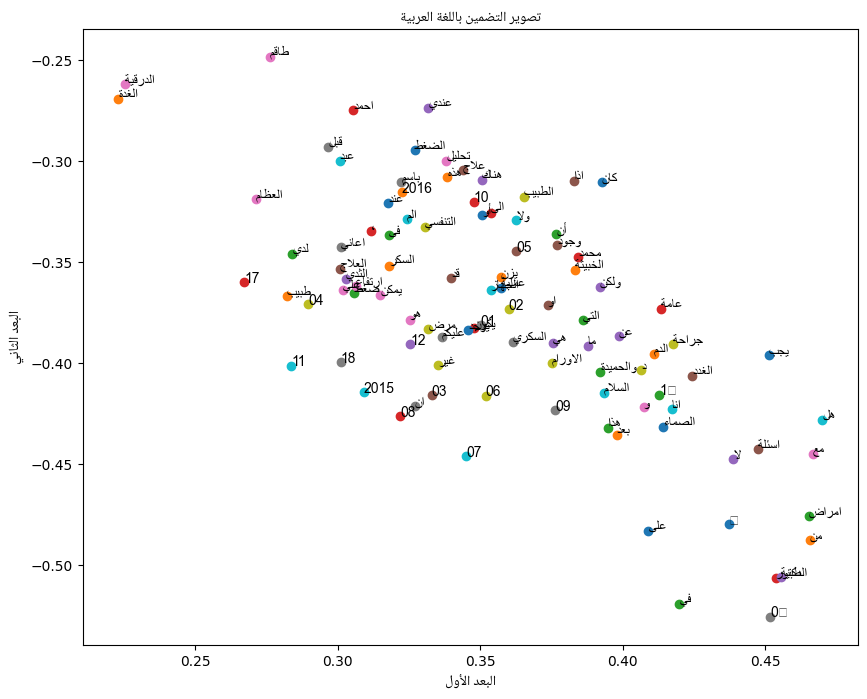

In [444]:
# import matplotlib.pyplot as plt

# embedding_layer = model.get_layer('embedding')
# weights = embedding_layer.get_weights()[0]

# word_index = tokenizer.word_index
# reverse_word_index = {v: k for k, v in word_index.items()}

# num_words_to_visualize = 100
# words_to_visualize = [reverse_word_index[i] for i in range(1, num_words_to_visualize + 1)]

# word_embeddings = weights[1:num_words_to_visualize + 1]

# plt.figure(figsize=(10, 8))
# for i, word in enumerate(words_to_visualize):
#     plt.scatter(word_embeddings[i, 0], word_embeddings[i, 1])
#     plt.text(word_embeddings[i, 0], word_embeddings[i, 1], word)

# plt.title('Word Embeddings Visualization')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.show()


import matplotlib.pyplot as plt
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display

arabic_font_path = 'font/NotoNaskhArabic-VariableFont_wght.ttf'

embedding_layer = model.get_layer('embedding_14')
weights = embedding_layer.get_weights()[0]

word_index = tokenizer.word_index
reverse_word_index = {v: k for k, v in word_index.items()}

num_words_to_visualize = 100
words_to_visualize = [reverse_word_index[i] for i in range(1, num_words_to_visualize + 1)]

word_embeddings = weights[1:num_words_to_visualize + 1]

plt.figure(figsize=(10, 8))

for i, word in enumerate(words_to_visualize):
    reshaped_word = arabic_reshaper.reshape(word)
    bidi_word = get_display(reshaped_word)

    plt.scatter(word_embeddings[i, 0], word_embeddings[i, 1])
    plt.text(word_embeddings[i, 0], word_embeddings[i, 1], bidi_word, fontproperties='Arial')

arabic_font = FontProperties(fname='font/NotoNaskhArabic-VariableFont_wght.ttf')
plt.title(get_display(arabic_reshaper.reshape('تصوير التضمين باللغة العربية')), fontproperties=arabic_font)
plt.xlabel(get_display(arabic_reshaper.reshape('البُعد الأول')), fontproperties=arabic_font)
plt.ylabel(get_display(arabic_reshaper.reshape('البُعد الثاني')), fontproperties=arabic_font)
plt.show()
 


## [6.5]

In [450]:
def analogy(word_a, word_b, word_c, model, tokenizer):
    
    embeddings = model.get_layer('embedding_14').get_weights()[0]
    word_index = tokenizer.word_index

    if all(word in word_index for word in [word_a, word_b, word_c]):
        a_idx, b_idx, c_idx = [word_index[word] for word in [word_a, word_b, word_c]]
        vec_a, vec_b, vec_c = embeddings[a_idx], embeddings[b_idx], embeddings[c_idx]

        # Calculate the analogy vector
        analogy_vector = vec_b - vec_a + vec_c

        # Find the closest word in the embedding space
        closest_word_idx = np.argmin(np.linalg.norm(embeddings - analogy_vector, axis=1))

        # Get the word from the index
        closest_word = list(word_index.keys())[list(word_index.values()).index(closest_word_idx)]
        return closest_word
    else:
        return None

# Example usage:
for _ in range(5):
    word_a = "ضغط"
    word_b = "علاج"
    word_c = "التنفسي"

    result = analogy(word_a, word_b, word_c, model, tokenizer)
    print(f"{word_a} is to {word_b} as {word_c} is to {result}")


# Question [7]: Deep Neural Network

## [7.1]

In [451]:
# from keras.backend import clear_session
# clear_session()

In [452]:
X_train_combined ,X_test_combined,X_validation_combined = Prepare_data()
X_train ,y_train,X_test,y_test,X_validation,y_validation =Prepare()
X_train_combined=callfunction(X_train_combined)

### [7.1.1]

In [453]:
def convert_to_tf_sparse(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape))

In [454]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train_combined)
X_test_bow = vectorizer.transform(X_test_combined)
X_validation_bow = vectorizer.transform(X_validation_combined)

X_train_sparse = convert_to_tf_sparse(X_train_bow)
X_test_sparse = convert_to_tf_sparse(X_test_bow)
X_validation_sparse = convert_to_tf_sparse(X_validation_bow)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_validation_encoded = label_encoder.transform(y_validation)

y_train_categorical = to_categorical(y_train_encoded, num_classes=8)
y_test_categorical = to_categorical(y_test_encoded, num_classes=8)
y_validation_categorical = to_categorical(y_validation_encoded, num_classes=8)

model_7_1_1 = Sequential()
model_7_1_1.add(Dense(64, activation='relu', input_dim=X_train_sparse.shape[1]))
# model.add(Dropout(0.5))
model_7_1_1.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
model_7_1_1.add(Dense(8, activation='softmax')) 

model_7_1_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_7_1_1.fit(X_train_sparse, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_validation_sparse, y_validation_categorical))

loss, accuracy = model.evaluate(X_test_sparse, y_test_categorical)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
1019/1019 [==============================] - 92s 88ms/step - loss: 1.1127 - accuracy: 0.7215 - val_loss: 1.1560 - val_accuracy: 0.7054
Epoch 2/10
1019/1019 [==============================] - 90s 88ms/step - loss: 0.6213 - accuracy: 0.7927 - val_loss: 1.3856 - val_accuracy: 0.6674
Epoch 3/10
1019/1019 [==============================] - 90s 88ms/step - loss: 0.2126 - accuracy: 0.9305 - val_loss: 1.8573 - val_accuracy: 0.6214
Epoch 4/10
1019/1019 [==============================] - 92s 90ms/step - loss: 0.0953 - accuracy: 0.9686 - val_loss: 2.1963 - val_accuracy: 0.6177
Epoch 5/10
1019/1019 [==============================] - 94s 93ms/step - loss: 0.0771 - accuracy: 0.9726 - val_loss: 2.3285 - val_accuracy: 0.6187
Epoch 6/10
1019/1019 [==============================] - 93s 91ms/step - loss: 0.0735 - accuracy: 0.9730 - val_loss: 2.3808 - val_accuracy: 0.6162
Epoch 7/10
1019/1019 [==============================] - 99s 97ms/step - loss: 0.0707 - accuracy: 0.9733 - val_loss: 2.5302 -

In [455]:
comparison_table['question_step_number'].append("7.1.1")
comparison_table['model_name'].append('Deep Neural Network')
comparison_table['features'].append('BOW')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("callfunction")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(loss)

### [7.1.2]

In [456]:
vectorizer  = TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))

train_data_X_train_combined = np.array(X_train_combined)
train_data_X_test_combined = np.array(X_test_combined)
train_data_X_validation_combined = np.array(X_validation_combined)
tfidf_matrix_X_train_combined = vectorizer .fit_transform(train_data_X_train_combined)
tfidf_matrix_X_test_combined = vectorizer .transform(train_data_X_test_combined)
tfidf_matrix_X_validation_combined = vectorizer .transform(train_data_X_validation_combined)

tfidf_matrix_X_train_combined=convert_to_tf_sparse(tfidf_matrix_X_train_combined)
tfidf_matrix_X_test_combined=convert_to_tf_sparse(tfidf_matrix_X_test_combined)
tfidf_matrix_X_validation_combined=convert_to_tf_sparse(tfidf_matrix_X_validation_combined)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_validation_encoded = label_encoder.transform(y_validation)

y_train_categorical = to_categorical(y_train_encoded, num_classes=8)
y_test_categorical = to_categorical(y_test_encoded, num_classes=8)
y_validation_categorical = to_categorical(y_validation_encoded, num_classes=8)


model_7_1_2 = Sequential()
model_7_1_2.add(Dense(64, activation='relu', input_dim=tfidf_matrix_X_train_combined.shape[1]))
model_7_1_2.add(Dropout(0.5))
model_7_1_2.add(Dense(32, activation='relu'))
model_7_1_2.add(Dropout(0.5))
model_7_1_2.add(Dense(y_train_categorical.shape[1], activation='softmax')) 

model_7_1_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_7_1_2.fit(tfidf_matrix_X_train_combined, y_train_categorical, epochs=5, batch_size=32,validation_data=(tfidf_matrix_X_validation_combined, y_validation_categorical))

loss, accuracy = model.evaluate(tfidf_matrix_X_test_combined, y_test_categorical)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/5
1019/1019 [==============================] - 144s 140ms/step - loss: 1.4317 - accuracy: 0.5842 - val_loss: 1.1666 - val_accuracy: 0.6984
Epoch 2/5
1019/1019 [==============================] - 141s 138ms/step - loss: 1.0585 - accuracy: 0.7154 - val_loss: 1.1618 - val_accuracy: 0.7041
Epoch 3/5
1019/1019 [==============================] - 140s 137ms/step - loss: 0.7897 - accuracy: 0.7629 - val_loss: 1.2446 - val_accuracy: 0.6988
Epoch 4/5
1019/1019 [==============================] - 160s 156ms/step - loss: 0.5670 - accuracy: 0.8212 - val_loss: 1.4069 - val_accuracy: 0.6906
Epoch 5/5
353/353 [==============================] - 1s 3ms/step - loss: 1.5788 - accuracy: 0.6799
Loss: 1.5787923336029053, Accuracy: 0.6799326539039612


In [457]:
comparison_table['question_step_number'].append("7.1.2")
comparison_table['model_name'].append('Deep Neural Network')
comparison_table['features'].append('TF-IDF')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("callfunction")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(loss)

## [7.2]

### [7.2.1]

In [63]:
X_train_combined ,X_test_combined,X_validation_combined = Prepare_data()
X_train ,y_train,X_test,y_test,X_validation,y_validation =Prepare()
X_train_combined=callfunction(X_train_combined)

embedding_layer_weights = model.layers[2].get_weights()[0]

In [68]:
# Assuming your training data (X_train_combined) and labels (y_train)
# Assuming you have trained your Skip-gram model as per your previous code
from keras.layers import Dense, Conv1D, AveragePooling1D, Flatten, Dropout,Embedding, Reshape, Input, Dot, GlobalMaxPooling1D
from keras.initializers import Constant
from keras.preprocessing.sequence import skipgrams,pad_sequences

# Assuming your sequence length is 5 and embedding dimension is 50 (increased sequence length)
sequence_length = 5
embedding_dim = 50

# Assuming you have the vocabulary size and word vectors from the Skip-gram model
# vocab_size = 102000
word_vectors = model.layers[2].get_weights()[0]  # Assuming model is your trained Skip-gram model
vocab_size = len(word_vectors)


# Create and compile the CNN model
cnn_model_1 = Sequential()
cnn_model_1.add(Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          embeddings_initializer=Constant(word_vectors),
                          input_length=sequence_length,
                          trainable=False))  # Fix the pre-trained word vectors
cnn_model_1.add(Dropout(0.5))
cnn_model_1.add(Conv1D(128, 5, activation='relu'))
cnn_model_1.add(Dropout(0.5))
cnn_model_1.add(GlobalMaxPooling1D())
cnn_model_1.add(Dense(8, activation='softmax')) 

# Compile the model
cnn_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have your training data (X_train_combined) and labels (y_train)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_combined)
X_train_seq = tokenizer.texts_to_sequences(X_train_combined)
X_test_seq = tokenizer.texts_to_sequences(X_test_combined)
X_validation_seq = tokenizer.texts_to_sequences(X_validation_combined)

# Assuming your y_train is one-hot encoded
y_onehot1 = pd.get_dummies(train_data['label'])
y_train = y_onehot1.values  # Convert to numpy array
y_onehot2 = pd.get_dummies(test_data['label'])
y_test = y_onehot2.values  # Convert to numpy array
y_onehot3 = pd.get_dummies(validation_data['label'])
y_validation = y_onehot3.values  # Convert to numpy array



# Assuming your X_train_seq is a list of sequences
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=sequence_length, padding='post', truncating='post')
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=sequence_length, padding='post', truncating='post')
X_validation_seq_padded = pad_sequences(X_validation_seq, maxlen=sequence_length, padding='post', truncating='post')

# Print shapes for debugging
print("X_train_seq_padded shape:", X_train_seq_padded.shape)

# Train the CNN model
cnn_model_1.fit(X_train_seq_padded, y_train, epochs=5, batch_size=32, validation_data=(X_validation_seq_padded,y_validation))
loss, accuracy = cnn_model_1.evaluate(X_test_seq_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


X_train_seq_padded shape: (32598, 5)
Epoch 1/5
1019/1019 [==============================] - 3s 2ms/step - loss: 1.9981 - accuracy: 0.1949 - val_loss: 1.9932 - val_accuracy: 0.1887
Epoch 2/5
1019/1019 [==============================] - 2s 2ms/step - loss: 1.9832 - accuracy: 0.1954 - val_loss: 1.9869 - val_accuracy: 0.1882
Epoch 3/5
1019/1019 [==============================] - 3s 3ms/step - loss: 1.9789 - accuracy: 0.1947 - val_loss: 1.9920 - val_accuracy: 0.1785
Epoch 4/5
1019/1019 [==============================] - 2s 2ms/step - loss: 1.9767 - accuracy: 0.1929 - val_loss: 1.9871 - val_accuracy: 0.1840
Epoch 5/5
353/353 [==============================] - 0s 1ms/step - loss: 1.9915 - accuracy: 0.1860
Loss: 1.9914524555206299, Accuracy: 0.18595993518829346


In [ ]:
loss, accuracy = cnn_model_1.evaluate(X_test_seq_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

In [70]:
comparison_table['question_step_number'].append("7.2.1")
comparison_table['model_name'].append('CNN')
comparison_table['features'].append('embedding')
comparison_table['model_parameters'].append('trainable=false')
comparison_table['preprocessing_methods'].append("")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(loss)

### [7.2.2]

In [69]:
sequence_length = 5
embedding_dim = 50

# Assuming you have the vocabulary size and word vectors from the Skip-gram model
# vocab_size = 102000
word_vectors = model.layers[2].get_weights()[0]  # Assuming model is your trained Skip-gram model
vocab_size = len(word_vectors)

# Create and compile the CNN model
cnn_model_2 = Sequential()
cnn_model_2.add(Embedding(input_dim=vocab_size,
                          output_dim=embedding_dim,
                          embeddings_initializer=Constant(word_vectors),
                          input_length=sequence_length,
                          trainable=True))  # Fix the pre-trained word vectors
cnn_model_2.add(Dropout(0.5))
cnn_model_2.add(Conv1D(128, 5, activation='relu'))
cnn_model_2.add(Dropout(0.5))
cnn_model_2.add(GlobalMaxPooling1D())
cnn_model_2.add(Dense(8, activation='softmax')) 

# Compile the model
cnn_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have your training data (X_train_combined) and labels (y_train)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_combined)
X_train_seq = tokenizer.texts_to_sequences(X_train_combined)
X_test_seq = tokenizer.texts_to_sequences(X_test_combined)
X_validation_seq = tokenizer.texts_to_sequences(X_validation_combined)

# Assuming your y_train is one-hot encoded
y_onehot1 = pd.get_dummies(train_data['label'])
y_train = y_onehot1.values  # Convert to numpy array
y_onehot2 = pd.get_dummies(test_data['label'])
y_test = y_onehot2.values  # Convert to numpy array
y_onehot3 = pd.get_dummies(validation_data['label'])
y_validation = y_onehot3.values  # Convert to numpy array

# Assuming your X_train_seq is a list of sequences
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=sequence_length, padding='post', truncating='post')
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=sequence_length, padding='post', truncating='post')
X_validation_seq_padded = pad_sequences(X_validation_seq, maxlen=sequence_length, padding='post', truncating='post')

# Print shapes for debugging
print("X_train_seq_padded shape:", X_train_seq_padded.shape)

# Train the CNN model
cnn_model_2.fit(X_train_seq_padded, y_train, epochs=5, batch_size=32, validation_data=(X_validation_seq_padded,y_validation))
loss, accuracy = cnn_model_2.evaluate(X_test_seq_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

X_train_seq_padded shape: (32598, 5)
Epoch 1/5
1019/1019 [==============================] - 8s 7ms/step - loss: 1.9950 - accuracy: 0.1953 - val_loss: 1.9843 - val_accuracy: 0.2100
Epoch 2/5
1019/1019 [==============================] - 6s 6ms/step - loss: 1.9439 - accuracy: 0.2104 - val_loss: 1.8978 - val_accuracy: 0.2452
Epoch 3/5
1019/1019 [==============================] - 6s 6ms/step - loss: 1.8585 - accuracy: 0.2692 - val_loss: 1.7994 - val_accuracy: 0.3516
Epoch 4/5
1019/1019 [==============================] - 7s 6ms/step - loss: 1.7704 - accuracy: 0.3397 - val_loss: 1.7333 - val_accuracy: 0.3997
Epoch 5/5
353/353 [==============================] - 0s 1ms/step - loss: 1.7098 - accuracy: 0.4044
Loss: 1.7097591161727905, Accuracy: 0.40436092019081116


In [71]:
comparison_table['question_step_number'].append("7.2.2")
comparison_table['model_name'].append('CNN')
comparison_table['features'].append('embedding')
comparison_table['model_parameters'].append('trainable=True')
comparison_table['preprocessing_methods'].append("")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(loss)

### [7.2.3]

In [463]:
# فرضاً لدينا حجم الفوكابولاري وأبعاد الأشعة
vocab_size = 102000
embedding_dim = 50

# Create and compile the CNN model
cnn_model_3 = Sequential()
cnn_model_3.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
cnn_model_3.add(Dropout(0.5))
cnn_model_3.add(Conv1D(128, 5, activation='relu'))
cnn_model_3.add(Dropout(0.5))
cnn_model_3.add(GlobalMaxPooling1D())
cnn_model_3.add(Dense(8, activation='softmax')) 

# Compile the model
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have your training data (X_train_combined) and labels (y_train)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_combined)
X_train_seq = tokenizer.texts_to_sequences(X_train_combined)
X_test_seq = tokenizer.texts_to_sequences(X_test_combined)
X_validation_seq = tokenizer.texts_to_sequences(X_validation_combined)

# Assuming your y_train is one-hot encoded
y_onehot1 = pd.get_dummies(train_data['label'])
y_train = y_onehot1.values  # Convert to numpy array
y_onehot2 = pd.get_dummies(test_data['label'])
y_test = y_onehot2.values  # Convert to numpy array
y_onehot3 = pd.get_dummies(validation_data['label'])
y_validation = y_onehot3.values  # Convert to numpy array

# Assuming your X_train_seq is a list of sequences
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=sequence_length, padding='post', truncating='post')
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=sequence_length, padding='post', truncating='post')
X_validation_seq_padded = pad_sequences(X_validation_seq, maxlen=sequence_length, padding='post', truncating='post')

# Print shapes for debugging
print("X_train_seq_padded shape:", X_train_seq_padded.shape)

# Train the CNN model
cnn_model_3.fit(X_train_seq_padded, y_train, epochs=5, batch_size=32, validation_data=(X_validation_seq_padded,y_validation))
loss, accuracy = cnn_model_3.evaluate(X_test_seq_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


X_train_seq_padded shape: (32598, 5)
Epoch 1/5
1019/1019 [==============================] - 57s 55ms/step - loss: 1.8243 - accuracy: 0.3192 - val_loss: 1.6885 - val_accuracy: 0.4098
Epoch 2/5
1019/1019 [==============================] - 56s 55ms/step - loss: 1.5553 - accuracy: 0.4702 - val_loss: 1.6500 - val_accuracy: 0.4356
Epoch 3/5
1019/1019 [==============================] - 55s 54ms/step - loss: 1.3590 - accuracy: 0.5553 - val_loss: 1.6836 - val_accuracy: 0.4324
Epoch 4/5
1019/1019 [==============================] - 55s 54ms/step - loss: 1.1913 - accuracy: 0.6118 - val_loss: 1.7529 - val_accuracy: 0.4198
Epoch 5/5
353/353 [==============================] - 1s 2ms/step - loss: 1.8457 - accuracy: 0.4027
Loss: 1.8457175493240356, Accuracy: 0.4026768207550049


In [464]:
comparison_table['question_step_number'].append("7.2.3")
comparison_table['model_name'].append('CNN')
comparison_table['features'].append('embedding')
comparison_table['model_parameters'].append('editing with running')
comparison_table['preprocessing_methods'].append("")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(loss)

### [7.2.4]

In [465]:
import gensim

file_path = 'w2v_SG_300_3_400_10.model'
word_embed = gensim.models.Word2Vec.load(file_path)

In [466]:
vocab_size = len(word_embed.wv.key_to_index)
embedding_dim = word_embed.vector_size

embedding_matrix = np.zeros((vocab_size, embedding_dim))


for i, word in enumerate(word_embed.wv.index_to_key):
    embedding_vector = word_embed.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [467]:
embeddings_index = embedding_matrix 

cnn_model_4 = Sequential()
cnn_model_4.add(Embedding(input_dim=len(embeddings_index), 
                    output_dim=embedding_dim, 
                    embeddings_initializer=Constant(embeddings_index),
                    trainable=False))
cnn_model_4.add(Dropout(0.5))
cnn_model_4.add(Conv1D(128, 5, activation='relu'))
cnn_model_4.add(Dropout(0.5))
cnn_model_4.add(GlobalMaxPooling1D())
cnn_model_4.add(Dense(8, activation='softmax')) 

# Compile the model
cnn_model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming you have your training data (X_train_combined) and labels (y_train)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_combined)
X_train_seq = tokenizer.texts_to_sequences(X_train_combined)
X_test_seq = tokenizer.texts_to_sequences(X_test_combined)
X_validation_seq = tokenizer.texts_to_sequences(X_validation_combined)

# Assuming your y_train is one-hot encoded
y_onehot1 = pd.get_dummies(train_data['label'])
y_train = y_onehot1.values  # Convert to numpy array
y_onehot2 = pd.get_dummies(test_data['label'])
y_test = y_onehot2.values  # Convert to numpy array
y_onehot3 = pd.get_dummies(validation_data['label'])
y_validation = y_onehot3.values  # Convert to numpy array

# Assuming your X_train_seq is a list of sequences
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=sequence_length, padding='post', truncating='post')
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=sequence_length, padding='post', truncating='post')
X_validation_seq_padded = pad_sequences(X_validation_seq, maxlen=sequence_length, padding='post', truncating='post')

# Print shapes for debugging
print("X_train_seq_padded shape:", X_train_seq_padded.shape)

# Train the CNN model
cnn_model_4.fit(X_train_seq_padded, y_train, epochs=5, batch_size=32, validation_data=(X_validation_seq_padded,y_validation))
loss, accuracy = cnn_model_4.evaluate(X_test_seq_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


X_train_seq_padded shape: (32598, 5)
Epoch 1/5
1019/1019 [==============================] - 7s 7ms/step - loss: 1.9633 - accuracy: 0.2297 - val_loss: 1.9103 - val_accuracy: 0.2780
Epoch 2/5
1019/1019 [==============================] - 6s 6ms/step - loss: 1.8878 - accuracy: 0.2749 - val_loss: 1.8786 - val_accuracy: 0.2961
Epoch 3/5
1019/1019 [==============================] - 7s 7ms/step - loss: 1.8552 - accuracy: 0.2925 - val_loss: 1.8497 - val_accuracy: 0.3045
Epoch 4/5
1019/1019 [==============================] - 7s 6ms/step - loss: 1.8307 - accuracy: 0.3091 - val_loss: 1.8410 - val_accuracy: 0.3166
Epoch 5/5
353/353 [==============================] - 1s 2ms/step - loss: 1.8378 - accuracy: 0.3195
Loss: 1.8377708196640015, Accuracy: 0.3195355534553528


In [468]:
comparison_table['question_step_number'].append("7.2.4")
comparison_table['model_name'].append('CNN')
comparison_table['features'].append('embedding from net')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(loss)

## [7.3]

Epoch 1/5
1019/1019 [==============================] - 56s 54ms/step - loss: 1.0273 - accuracy: 0.6621 - val_loss: 1.8502 - val_accuracy: 0.4136
Epoch 2/5
1019/1019 [==============================] - 55s 54ms/step - loss: 0.9682 - accuracy: 0.6808 - val_loss: 1.9127 - val_accuracy: 0.4093
Epoch 3/5
1019/1019 [==============================] - 56s 55ms/step - loss: 0.9035 - accuracy: 0.6965 - val_loss: 1.9627 - val_accuracy: 0.4050
Epoch 4/5
1019/1019 [==============================] - 56s 55ms/step - loss: 0.8559 - accuracy: 0.7090 - val_loss: 2.0132 - val_accuracy: 0.3973
Epoch 5/5
353/353 [==============================] - 1s 2ms/step - loss: 2.0766 - accuracy: 0.3814
Loss: 2.0765535831451416, Accuracy: 0.38140401244163513


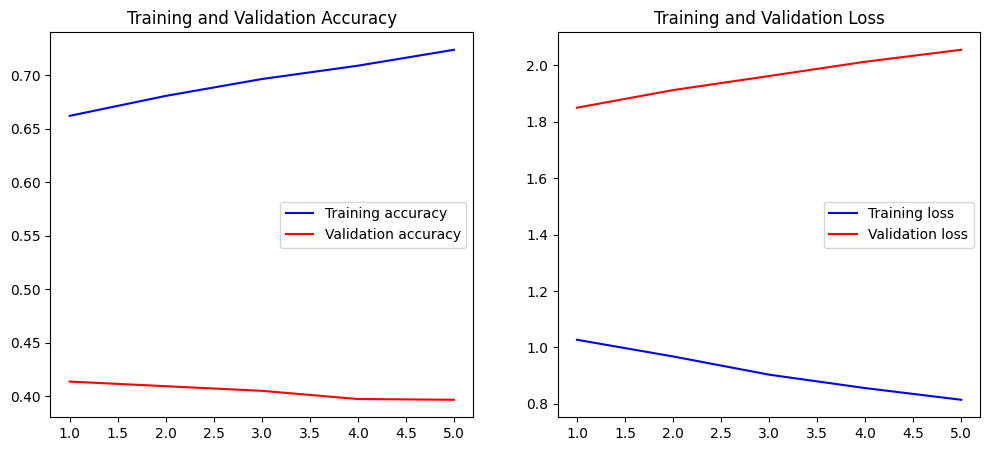

In [469]:
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = cnn_model_3.fit(X_train_seq_padded, y_train, epochs=5, batch_size=32, validation_data=(X_validation_seq_padded, y_validation))

loss, accuracy = cnn_model_3.evaluate(X_test_seq_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


## Extra [7.4]

353/353 [==============================] - 1s 2ms/step


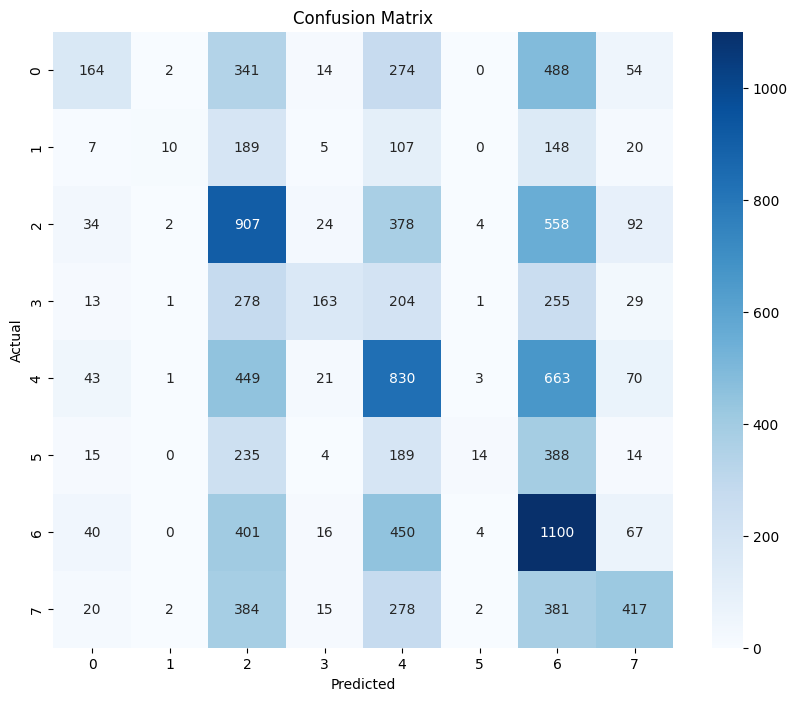

In [470]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# الحصول على توقعات النموذج
y_pred = cnn_model_4.predict(X_test_seq_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# حساب مصفوفة التعارضات
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# رسم مصفوفة التعارضات
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [471]:
import tensorflow as tf
from keras import backend as K

def f1_score(y_true, y_pred):
    # حساب الاستدعاء
    recall = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) / K.sum(K.round(K.clip(y_true, 0, 1)))
    # حساب الدقة
    precision = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) / K.sum(K.round(K.clip(y_pred, 0, 1)))
    # حساب F1 score
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

# بعد ذلك، يمكنك استخدام هذه الدالة كمعيار عند تجميع النموذج
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_score])

cnn_model_3.fit(X_train_seq_padded, y_train, epochs=5, batch_size=32, validation_data=(X_validation_seq_padded, y_validation))
loss, accuracy = cnn_model_4.evaluate(X_test_seq_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/5
1019/1019 [==============================] - 61s 58ms/step - loss: 0.8006 - f1_score: 0.7261 - val_loss: 2.1086 - val_f1_score: 0.3628
Epoch 2/5
1019/1019 [==============================] - 57s 56ms/step - loss: 0.7752 - f1_score: 0.7360 - val_loss: 2.1749 - val_f1_score: 0.3578
Epoch 3/5
1019/1019 [==============================] - 59s 58ms/step - loss: 0.7533 - f1_score: 0.7434 - val_loss: 2.2126 - val_f1_score: 0.3535
Epoch 4/5
1019/1019 [==============================] - 58s 56ms/step - loss: 0.7359 - f1_score: 0.7498 - val_loss: 2.2556 - val_f1_score: 0.3519
Epoch 5/5
353/353 [==============================] - 1s 2ms/step - loss: 1.8378 - accuracy: 0.3195
Loss: 1.8377708196640015, Accuracy: 0.3195355534553528


In [472]:
comparison_table['question_step_number'].append("7.4")
comparison_table['model_name'].append('CNN')
comparison_table['features'].append('embedding from net')
comparison_table['model_parameters'].append('custom function')
comparison_table['preprocessing_methods'].append("")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(loss)

# Final Results

In [74]:
# df = pd.DataFrame(comparison_table)
# df

In [73]:
#[عبدالرؤوف حسحس _طوني بطرس _عبد الله الزبداني]
df.to_csv(" عبدالرؤوف حسحس _طوني بطرس _عبد الله الزبداني.csv", index=False)